<center><h1>Jaini Bhavsar</h1></center><hr>

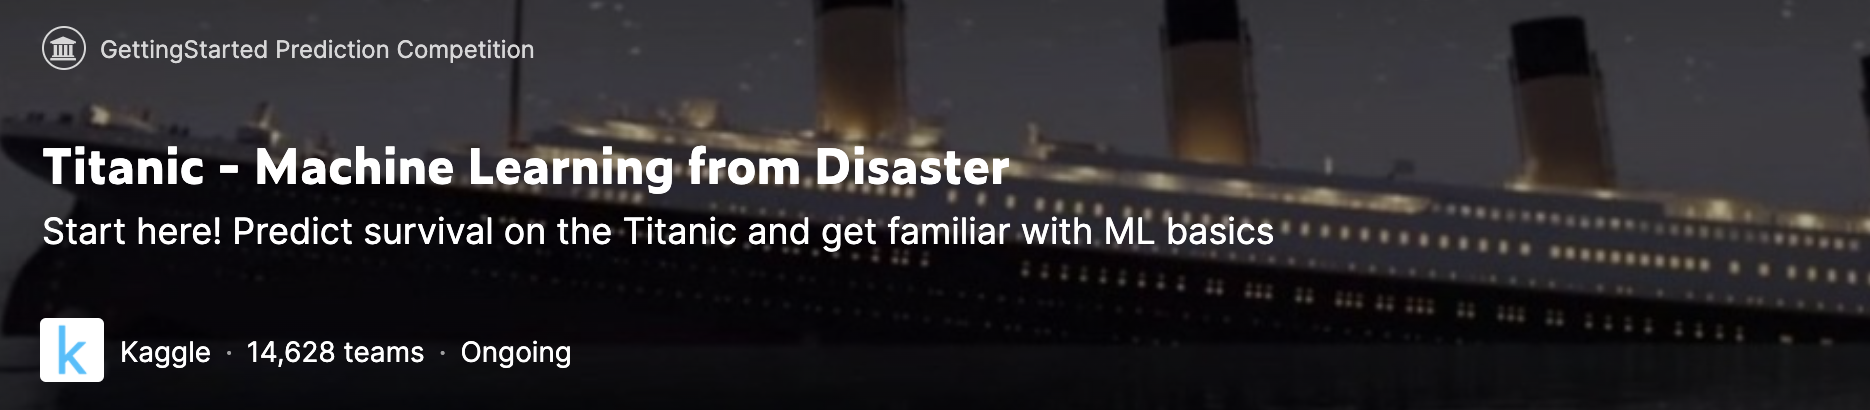

<center><h1>Titanic - Machine Learning From Disaster</h1></center>

<hr>

<hr>

<h4>Features created for the project</h4><br>
<ul>
    <li>Total Family</li>
    <li>Society Value</li>
    <li>Fancy</li>
    <li>Family Ratio</li>
    <li>PLSeat (Probability of Seat on Lifeboat)</li>
</ul>

<hr>

<h4>ML models for Project</h4><br>
<ul>
    <li>Logistic Regression <code>Used train_df_supervised for training purpose</code></li> 
    <li>Gaussian Naive Bayes <code>Used train_df_supervised for training purpose</code></li>
    <li>XGBoost <code>Used train_df_advanced for training purpose</code></li>
</ul>

<hr>

Different hyperparameters were used in different iterations along with different data like normalized, standard scaled, removed noise using filter, etc, for scores improvement

<h2>Data Fetching</h2>
<hr>

<code>Data fetching involves extraction of data from train.csv file which comprises of 12 columns. Survived is the output column and all other columns are input columns.</code>

<code>This step involves reading the csv file through pandas 'read_csv' file.</code>

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df_supervised = pd.read_csv('train.csv')
train_df_supervised.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df_advanced = train_df_supervised.copy()
train_df_advanced.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df_supervised = pd.read_csv('test.csv')
test_df_supervised.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_df_advanced = test_df_supervised.copy()
test_df_advanced.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h2> Data Preprocessing </h2>
* Data quality checking, missing data imputation.
<hr>

<code>Data Preprocessing involves transformation of data to refined format so that it becomes appropriate to train the model.</code>

<code><i>Note:&nbsp;</i>Data Preprocessing and feature selection will go hand-in-hand for this project since the training/testing data have 12 columns which needs to be checked for data type and missing/NaN values, and we are supposed to create new features as well.</code>

In [6]:
train_df_supervised.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
y_supervised = train_df_supervised['Survived']
y_supervised.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
train_df_advanced.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
y_advanced = train_df_advanced['Survived']
y_advanced.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [10]:
test_df_supervised.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test_df_advanced.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
train_df_supervised.drop('Survived', axis=1, inplace=True)
train_df_advanced.drop('Survived', axis=1, inplace=True)

In [13]:
train_df_supervised.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_df_advanced.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<code>Checking for null values in train dataframe supervised and advanced below.</code>

In [15]:
for column in train_df_supervised:
    if train_df_supervised[column].isnull().any():
       print('{0} has {1} null values'.format(column, train_df_supervised[column].isnull().sum()))

Age has 177 null values
Cabin has 687 null values
Embarked has 2 null values


In [16]:
for column in train_df_supervised:
    if train_df_advanced[column].isnull().any():
       print('{0} has {1} null values'.format(column, train_df_supervised[column].isnull().sum()))

Age has 177 null values
Cabin has 687 null values
Embarked has 2 null values


<h3>Drop 'PassengerId' Column</h3>

<code>Dropped the feature 'PassengerId' as it has no impact on model and 'PassengerId' in the data is just like index to the property with not much significance in training and testing.</code>

In [17]:
train_df_supervised.drop('PassengerId', axis=1, inplace=True)
train_df_advanced.drop('PassengerId', axis=1, inplace=True)

In [18]:
train_df_supervised.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train_df_advanced.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test_df_supervised.drop('PassengerId', axis=1, inplace=True)
test_df_advanced.drop('PassengerId', axis=1, inplace=True)

In [21]:
test_df_supervised.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
test_df_advanced.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h3>Drop 'Name' Column</h3>

<code>Dropped the feature 'Name' as it has no impact on model and 'Name' in the data is just like index to the property with not much significance in training and testing.</code>

In [23]:
train_df_supervised.drop('Name', axis=1, inplace=True)
train_df_advanced.drop('Name', axis=1, inplace=True)

In [24]:
train_df_supervised.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train_df_advanced.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
test_df_supervised.drop('Name', axis=1, inplace=True)
test_df_advanced.drop('Name', axis=1, inplace=True)

In [27]:
test_df_supervised.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
test_df_advanced.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
import numpy as np
numeric_columns_in_train = train_df_supervised.select_dtypes(include=np.number).columns.tolist()
numeric_columns_in_train

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [30]:
for column in numeric_columns_in_train:
    train_df_supervised[column] = train_df_supervised[column].fillna(train_df_supervised[column].mean())
    test_df_supervised[column] = test_df_supervised[column].fillna(test_df_supervised[column].mean())

In [31]:
total_set = set(train_df_supervised.columns)
numeric_set = set(numeric_columns_in_train)

In [32]:
total_set - numeric_set

{'Cabin', 'Embarked', 'Sex', 'Ticket'}

In [33]:
object_columns_in_train = list(total_set)
object_columns_in_train

['Cabin',
 'Embarked',
 'SibSp',
 'Fare',
 'Age',
 'Parch',
 'Sex',
 'Pclass',
 'Ticket']

In [34]:
for column in object_columns_in_train:
    train_df_supervised[column] = train_df_supervised[column].fillna(train_df_supervised[column].mode()[0])
    test_df_supervised[column] = test_df_supervised[column].fillna(test_df_supervised[column].mode()[0])

In [35]:
train_df_supervised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [36]:
train_df_supervised.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


<hr>

<h2>Feature Engineering</h2>
* Feature engineering: create new features from the raw data
<hr>

<h3>One-Hot Encoding</h3> 

<code>Below is the function of One-Hot Encoding. This function is generalized to handle all sorts of columns in training and testing data.</code>

In [37]:
def one_hot_encode(feature, df, dictionary = {}):
    for f in df[feature].unique():
        dictionary[f] = []
    for key, value in dictionary.items():
        df[key] = np.nan  
    for i in range(0, len(df)):
        change_key = [df.iloc[i][feature]]
        no_change_keys = list(set(dictionary.keys()) - set(change_key)) 
        if change_key[0] in dictionary: 
            dictionary[change_key[0]].append(1)
        for no_change_key in no_change_keys:
            dictionary[no_change_key].append(0)
    for key, items in dictionary.items():
        df[key] = dictionary[key]
    df.drop(feature , axis=1, inplace = True)

In [38]:
one_hot_encode('Sex', train_df_supervised)
one_hot_encode('Sex', train_df_advanced)

In [39]:
train_df_supervised.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female
0,3,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,0
1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,1
3,1,35.0,1,0,113803,53.1000,C123,S,0,1
4,3,35.0,0,0,373450,8.0500,B96 B98,S,1,0


In [40]:
train_df_advanced.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female
0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,35.0,1,0,113803,53.1000,C123,S,0,1
4,3,35.0,0,0,373450,8.0500,NaN,S,1,0


In [41]:
one_hot_encode('Sex', test_df_supervised)
one_hot_encode('Sex', test_df_advanced)

In [42]:
test_df_supervised.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female
0,3,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,1,0
1,3,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,0,1
2,2,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,1,0
3,3,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,1,0
4,3,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,0,1


In [43]:
test_df_advanced.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female
0,3,34.5,0,0,330911,7.8292,NaN,Q,1,0
1,3,47.0,1,0,363272,7.0000,NaN,S,0,1
2,2,62.0,0,0,240276,9.6875,NaN,Q,1,0
3,3,27.0,0,0,315154,8.6625,NaN,S,1,0
4,3,22.0,1,1,3101298,12.2875,NaN,S,0,1


In [44]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
train_df_advanced['Ticket'] = lbl.fit_transform(train_df_advanced['Ticket'].astype(str))
train_df_advanced['Cabin'] = lbl.fit_transform(train_df_advanced['Cabin'].astype(str))
train_df_advanced['Embarked'] = lbl.fit_transform(train_df_advanced['Embarked'].astype(str))

In [45]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
test_df_advanced['Ticket'] = lbl.fit_transform(test_df_advanced['Ticket'].astype(str))
test_df_advanced['Cabin'] = lbl.fit_transform(test_df_advanced['Cabin'].astype(str))
test_df_advanced['Embarked'] = lbl.fit_transform(test_df_advanced['Embarked'].astype(str))

In [46]:
train_df_supervised.drop(['Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_df_supervised.drop(['Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [47]:
train_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female
0,3,22.0,1,0,7.2500,1,0
1,1,38.0,1,0,71.2833,0,1
2,3,26.0,0,0,7.9250,0,1
3,1,35.0,1,0,53.1000,0,1
4,3,35.0,0,0,8.0500,1,0


In [48]:
test_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female
0,3,34.5,0,0,7.8292,1,0
1,3,47.0,1,0,7.0000,0,1
2,2,62.0,0,0,9.6875,1,0
3,3,27.0,0,0,8.6625,1,0
4,3,22.0,1,1,12.2875,0,1


In [49]:
train_df_advanced.drop(['Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_df_advanced.drop(['Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [50]:
train_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female
0,3,22.0,1,0,7.2500,1,0
1,1,38.0,1,0,71.2833,0,1
2,3,26.0,0,0,7.9250,0,1
3,1,35.0,1,0,53.1000,0,1
4,3,35.0,0,0,8.0500,1,0


In [51]:
test_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female
0,3,34.5,0,0,7.8292,1,0
1,3,47.0,1,0,7.0000,0,1
2,2,62.0,0,0,9.6875,1,0
3,3,27.0,0,0,8.6625,1,0
4,3,22.0,1,1,12.2875,0,1


<h3>Create Feature 'Total Family'</h3>

<code>The 'Total Family' feature combines the number of siblings and parents/children to provide a consolidated item that indicates the number of family members aboard. The reasoning for creating this feature is that having loved ones aboard with you would likely have some impact on a persons ability to survive in a catastrophy such as the Titanic; it could positively impact the survival by motivating the person to survive and protect their family members, or it could negatively impact a persons ability to survive because a persons focus may be split between caring for their family members.</code>

In [52]:
train_df_supervised['Total Family'] = train_df_supervised['SibSp'] + train_df_supervised['Parch']
test_df_supervised['Total Family'] = test_df_supervised['SibSp'] + test_df_supervised['Parch']

In [53]:
train_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,1,1
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,1
4,3,35.0,0,0,8.0500,1,0,0


In [54]:
test_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family
0,3,34.5,0,0,7.8292,1,0,0
1,3,47.0,1,0,7.0000,0,1,1
2,2,62.0,0,0,9.6875,1,0,0
3,3,27.0,0,0,8.6625,1,0,0
4,3,22.0,1,1,12.2875,0,1,2


In [55]:
train_df_advanced['Total Family'] = train_df_advanced['SibSp'] + train_df_advanced['Parch']
test_df_advanced['Total Family'] = test_df_advanced['SibSp'] + test_df_advanced['Parch']

In [56]:
train_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,1,1
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,1
4,3,35.0,0,0,8.0500,1,0,0


In [57]:
test_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family
0,3,34.5,0,0,7.8292,1,0,0
1,3,47.0,1,0,7.0000,0,1,1
2,2,62.0,0,0,9.6875,1,0,0
3,3,27.0,0,0,8.6625,1,0,0
4,3,22.0,1,1,12.2875,0,1,2


<h3>Create Feature 'Fancy'</h3>

<code>The 'Fancy' feature combines the Class and Fare price of an individual to provide an enhanced indicator of a persons socioeceonomic status (the higher the class and the higher the ticket price would indicate a very wealthy/important individual, while a low class and low ticket price would indicate that individual to be of lower class and wealth).</code>

In [58]:
train_df_supervised['Fancy'] = train_df_supervised['Pclass'] + train_df_supervised['Fare']
test_df_supervised['Fancy'] = test_df_supervised['Pclass'] + test_df_supervised['Fare']

In [59]:
train_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy
0,3,22.0,1,0,7.2500,1,0,1,10.2500
1,1,38.0,1,0,71.2833,0,1,1,72.2833
2,3,26.0,0,0,7.9250,0,1,0,10.9250
3,1,35.0,1,0,53.1000,0,1,1,54.1000
4,3,35.0,0,0,8.0500,1,0,0,11.0500


In [60]:
test_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy
0,3,34.5,0,0,7.8292,1,0,0,10.8292
1,3,47.0,1,0,7.0000,0,1,1,10.0000
2,2,62.0,0,0,9.6875,1,0,0,11.6875
3,3,27.0,0,0,8.6625,1,0,0,11.6625
4,3,22.0,1,1,12.2875,0,1,2,15.2875


In [61]:
train_df_advanced['Fancy'] = train_df_advanced['Pclass'] + train_df_advanced['Fare']
test_df_advanced['Fancy'] = test_df_advanced['Pclass'] + test_df_advanced['Fare']

In [62]:
train_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy
0,3,22.0,1,0,7.2500,1,0,1,10.2500
1,1,38.0,1,0,71.2833,0,1,1,72.2833
2,3,26.0,0,0,7.9250,0,1,0,10.9250
3,1,35.0,1,0,53.1000,0,1,1,54.1000
4,3,35.0,0,0,8.0500,1,0,0,11.0500


In [63]:
test_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy
0,3,34.5,0,0,7.8292,1,0,0,10.8292
1,3,47.0,1,0,7.0000,0,1,1,10.0000
2,2,62.0,0,0,9.6875,1,0,0,11.6875
3,3,27.0,0,0,8.6625,1,0,0,11.6625
4,3,22.0,1,1,12.2875,0,1,2,15.2875


<h3>Create Feature 'Society Value'</h3>

<code>The 'Society Value' is similar to the 'Fancy' feature but also includes a persons age as a factor. The intuition is that a younger high class individual has more promise for a positive future upon returning to society and therefore would have a more likely chance of being chosen for saving/survival.</code>

In [64]:
train_df_supervised['Society Value'] = train_df_supervised['Fancy'] / train_df_supervised['Age'] 
test_df_supervised['Society Value'] = test_df_supervised['Fancy'] / test_df_supervised['Age']

In [65]:
train_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value
0,3,22.0,1,0,7.2500,1,0,1,10.2500,0.465909
1,1,38.0,1,0,71.2833,0,1,1,72.2833,1.902192
2,3,26.0,0,0,7.9250,0,1,0,10.9250,0.420192
3,1,35.0,1,0,53.1000,0,1,1,54.1000,1.545714
4,3,35.0,0,0,8.0500,1,0,0,11.0500,0.315714


In [66]:
test_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value
0,3,34.5,0,0,7.8292,1,0,0,10.8292,0.313890
1,3,47.0,1,0,7.0000,0,1,1,10.0000,0.212766
2,2,62.0,0,0,9.6875,1,0,0,11.6875,0.188508
3,3,27.0,0,0,8.6625,1,0,0,11.6625,0.431944
4,3,22.0,1,1,12.2875,0,1,2,15.2875,0.694886


In [67]:
train_df_advanced['Society Value'] = train_df_advanced['Fancy'] / train_df_advanced['Age'] 
test_df_advanced['Society Value'] = test_df_advanced['Fancy'] / test_df_advanced['Age']

In [68]:
train_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value
0,3,22.0,1,0,7.2500,1,0,1,10.2500,0.465909
1,1,38.0,1,0,71.2833,0,1,1,72.2833,1.902192
2,3,26.0,0,0,7.9250,0,1,0,10.9250,0.420192
3,1,35.0,1,0,53.1000,0,1,1,54.1000,1.545714
4,3,35.0,0,0,8.0500,1,0,0,11.0500,0.315714


In [69]:
test_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value
0,3,34.5,0,0,7.8292,1,0,0,10.8292,0.313890
1,3,47.0,1,0,7.0000,0,1,1,10.0000,0.212766
2,2,62.0,0,0,9.6875,1,0,0,11.6875,0.188508
3,3,27.0,0,0,8.6625,1,0,0,11.6625,0.431944
4,3,22.0,1,1,12.2875,0,1,2,15.2875,0.694886


<h3>Create Feature 'Family Ratio'</h3>

<code>The 'Family Ratio' feature adds an additional dynamic to the family information already included within the data set and 'Total Family' feature we created.</code>

In [70]:
train_df_supervised['Family Ratio'] = train_df_supervised['Total Family'] / ( 1 + train_df_supervised['Parch'])
test_df_supervised['Family Ratio'] = test_df_supervised['Total Family'] / (1 + test_df_supervised['Parch'])

In [71]:
train_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio
0,3,22.0,1,0,7.2500,1,0,1,10.2500,0.465909,1.0
1,1,38.0,1,0,71.2833,0,1,1,72.2833,1.902192,1.0
2,3,26.0,0,0,7.9250,0,1,0,10.9250,0.420192,0.0
3,1,35.0,1,0,53.1000,0,1,1,54.1000,1.545714,1.0
4,3,35.0,0,0,8.0500,1,0,0,11.0500,0.315714,0.0


In [72]:
test_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio
0,3,34.5,0,0,7.8292,1,0,0,10.8292,0.313890,0.0
1,3,47.0,1,0,7.0000,0,1,1,10.0000,0.212766,1.0
2,2,62.0,0,0,9.6875,1,0,0,11.6875,0.188508,0.0
3,3,27.0,0,0,8.6625,1,0,0,11.6625,0.431944,0.0
4,3,22.0,1,1,12.2875,0,1,2,15.2875,0.694886,1.0


In [73]:
train_df_advanced['Family Ratio'] = train_df_advanced['Total Family'] / (1 + train_df_advanced['Parch']) 
test_df_advanced['Family Ratio'] = test_df_advanced['Total Family'] / (1 + test_df_advanced['Parch'])

In [74]:
train_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio
0,3,22.0,1,0,7.2500,1,0,1,10.2500,0.465909,1.0
1,1,38.0,1,0,71.2833,0,1,1,72.2833,1.902192,1.0
2,3,26.0,0,0,7.9250,0,1,0,10.9250,0.420192,0.0
3,1,35.0,1,0,53.1000,0,1,1,54.1000,1.545714,1.0
4,3,35.0,0,0,8.0500,1,0,0,11.0500,0.315714,0.0


In [75]:
test_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio
0,3,34.5,0,0,7.8292,1,0,0,10.8292,0.313890,0.0
1,3,47.0,1,0,7.0000,0,1,1,10.0000,0.212766,1.0
2,2,62.0,0,0,9.6875,1,0,0,11.6875,0.188508,0.0
3,3,27.0,0,0,8.6625,1,0,0,11.6625,0.431944,0.0
4,3,22.0,1,1,12.2875,0,1,2,15.2875,0.694886,1.0


<h3>Create Feature 'PLSeat'</h3>

<code>The 'PLSeat' feature represents the presummed probability that an individual would be afforded a spot on one of the life boats. As we've all seen from the movie Titanic, Women and Children first...</code>

In [76]:
def add_plseat(plseat_val, df):
    for index, row in df.iterrows():
        if row['male'] == 1:
            if row['Age'] > 50:
                plseat_val.append(0.1)
            elif row['Age'] > 40 and row['Age'] <= 50:
                plseat_val.append(0.2)
            elif row['Age'] > 30 and row['Age'] <= 40:
                plseat_val.append(0.4)
            elif row['Age'] > 20 and row['Age'] <= 30:
                plseat_val.append(0.6)
            elif row['Age'] > 10 and row['Age'] <= 20:
                plseat_val.append(0.9)
            elif row['Age'] <= 10:
                plseat_val.append(1)
            else:
                plseat_val.append(0)    
        else:
            if row['Age'] > 50:
                plseat_val.append(0.3)
            elif row['Age'] > 40 and row['Age'] <= 50:
                plseat_val.append(0.5)
            elif row['Age'] > 30 and row['Age'] <= 40:
                plseat_val.append(0.7)
            elif row['Age'] > 20 and row['Age'] <= 30:
                plseat_val.append(0.8)
            elif row['Age'] > 10 and row['Age'] <= 20:
                plseat_val.append(0.9)
            elif row['Age'] <= 10:
                plseat_val.append(1)
            else:
                plseat_val.append(0)   
    return plseat_val

In [77]:
train_df_supervised['PLSeat'] = add_plseat(list(), train_df_supervised)
test_df_supervised['PLSeat'] = add_plseat(list(), test_df_supervised)

In [78]:
train_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
0,3,22.0,1,0,7.2500,1,0,1,10.2500,0.465909,1.0,0.6
1,1,38.0,1,0,71.2833,0,1,1,72.2833,1.902192,1.0,0.7
2,3,26.0,0,0,7.9250,0,1,0,10.9250,0.420192,0.0,0.8
3,1,35.0,1,0,53.1000,0,1,1,54.1000,1.545714,1.0,0.7
4,3,35.0,0,0,8.0500,1,0,0,11.0500,0.315714,0.0,0.4


In [79]:
test_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
0,3,34.5,0,0,7.8292,1,0,0,10.8292,0.313890,0.0,0.4
1,3,47.0,1,0,7.0000,0,1,1,10.0000,0.212766,1.0,0.5
2,2,62.0,0,0,9.6875,1,0,0,11.6875,0.188508,0.0,0.1
3,3,27.0,0,0,8.6625,1,0,0,11.6625,0.431944,0.0,0.6
4,3,22.0,1,1,12.2875,0,1,2,15.2875,0.694886,1.0,0.8


In [80]:
train_df_advanced['PLSeat'] = add_plseat(list(), train_df_advanced)
test_df_advanced['PLSeat'] = add_plseat(list(), test_df_advanced)

In [81]:
train_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
0,3,22.0,1,0,7.2500,1,0,1,10.2500,0.465909,1.0,0.6
1,1,38.0,1,0,71.2833,0,1,1,72.2833,1.902192,1.0,0.7
2,3,26.0,0,0,7.9250,0,1,0,10.9250,0.420192,0.0,0.8
3,1,35.0,1,0,53.1000,0,1,1,54.1000,1.545714,1.0,0.7
4,3,35.0,0,0,8.0500,1,0,0,11.0500,0.315714,0.0,0.4


In [82]:
test_df_advanced.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
0,3,34.5,0,0,7.8292,1,0,0,10.8292,0.313890,0.0,0.4
1,3,47.0,1,0,7.0000,0,1,1,10.0000,0.212766,1.0,0.5
2,2,62.0,0,0,9.6875,1,0,0,11.6875,0.188508,0.0,0.1
3,3,27.0,0,0,8.6625,1,0,0,11.6625,0.431944,0.0,0.6
4,3,22.0,1,1,12.2875,0,1,2,15.2875,0.694886,1.0,0.8


<hr>

<h2> Feature Selection : Manual</h2>
* Feature selection. What's your rationals to choose those features.
<hr>

<code>Used feature selection to verify our feature engineering was successful in adding value to the model. Since we already dropped unneccessary columns such as ID and Name, </code>

In [83]:
train_df_supervised.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'female',
       'Total Family', 'Fancy', 'Society Value', 'Family Ratio', 'PLSeat'],
      dtype='object')

In [84]:
train_df_advanced.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'female',
       'Total Family', 'Fancy', 'Society Value', 'Family Ratio', 'PLSeat'],
      dtype='object')

<h3>Handling Outliers</h3>


<code>Outlier removal is a necessary step to remove data points that would inappropriately influence the model training.</code>

In [85]:
len(train_df_supervised)

891

In [86]:
train_df_outlier = train_df_supervised.copy()
train_df_outlier['Survived'] = y_supervised
train_df_outlier.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat,Survived
0,3,22.0,1,0,7.2500,1,0,1,10.2500,0.465909,1.0,0.6,0
1,1,38.0,1,0,71.2833,0,1,1,72.2833,1.902192,1.0,0.7,1
2,3,26.0,0,0,7.9250,0,1,0,10.9250,0.420192,0.0,0.8,1
3,1,35.0,1,0,53.1000,0,1,1,54.1000,1.545714,1.0,0.7,1
4,3,35.0,0,0,8.0500,1,0,0,11.0500,0.315714,0.0,0.4,0


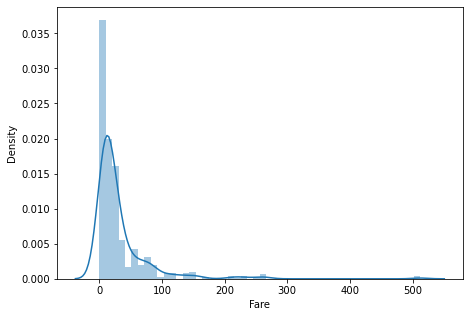

In [87]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(train_df_outlier['Fare'])
plt.show()

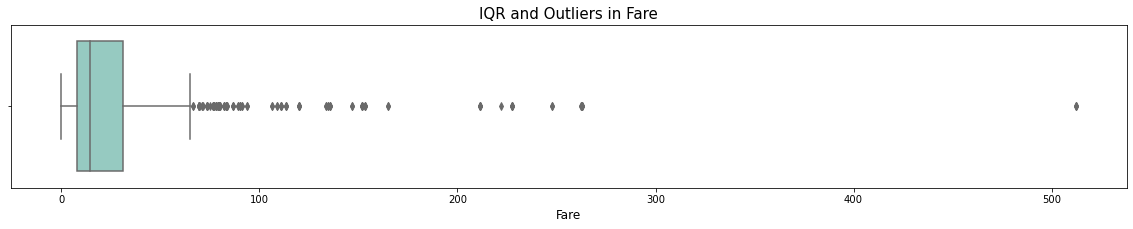

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 3))
sns.boxplot(x=train_df_outlier['Fare'], palette="Set3")
plt.title('IQR and Outliers in Fare', fontsize=15)
plt.xlabel('Fare', fontsize=12)
plt.show()

In [89]:
train_df_outlier['Fare'].quantile([0.25,0.5,0.75,0.9,0.95,0.99])

0.25      7.91040
0.50     14.45420
0.75     31.00000
0.90     77.95830
0.95    112.07915
0.99    249.00622
Name: Fare, dtype: float64

In [90]:
upper_lim = train_df_outlier['Fare'].quantile(.83)
lower_lim = train_df_outlier['Fare'].quantile(.17) 

train_df_outlier = train_df_outlier[(train_df_outlier['Fare'] < upper_lim) & (train_df_outlier['Fare'] > lower_lim)]

In [91]:
len(train_df_outlier)

579

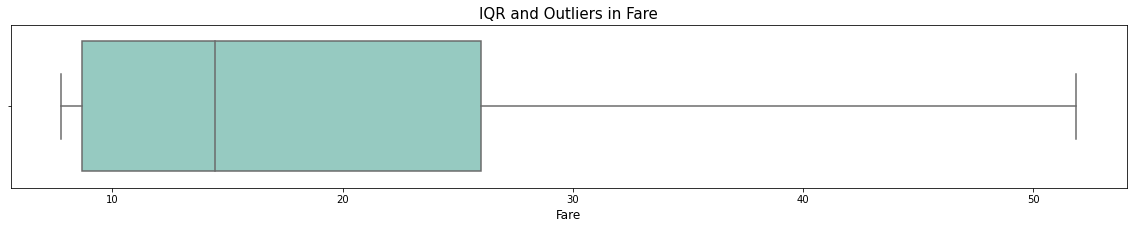

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 3))
sns.boxplot(x=train_df_outlier['Fare'], palette="Set3")
plt.title('IQR and Outliers in Fare', fontsize=15)
plt.xlabel('Fare', fontsize=12)
plt.show()

In [93]:
Q1 = train_df_outlier['Fare'].quantile(0.25)
Q3 = train_df_outlier['Fare'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

8.6625 26.0 17.3375


In [94]:
y_supervised = train_df_outlier['Survived']
train_df_outlier.drop('Survived', axis=1, inplace=True)
train_df_supervised = train_df_outlier.copy()

In [95]:
train_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
2,3,26.000000,0,0,7.9250,0,1,0,10.9250,0.420192,0.0,0.8
4,3,35.000000,0,0,8.0500,1,0,0,11.0500,0.315714,0.0,0.4
5,3,29.699118,0,0,8.4583,1,0,0,11.4583,0.385813,0.0,0.6
6,1,54.000000,0,0,51.8625,1,0,0,52.8625,0.978935,0.0,0.1
7,3,2.000000,3,1,21.0750,1,0,4,24.0750,12.037500,2.0,1.0


In [96]:
y_supervised.head()

2    1
4    0
5    0
6    0
7    0
Name: Survived, dtype: int64

<hr>

<h3>Filtering Noise using Savitzky–Golay filter</h3>

<code>Filtering noise from our data set helps us more smoothly represent the information and shows the overall trajectory of the data wihtout as many uninformative sparatic changes.</code>

In [97]:
from scipy.signal import savgol_filter
def my_filter(x):
    return savgol_filter(x, 5, 2)
train_df_supervised1 = train_df_supervised.apply(my_filter)

In [98]:
train_df_supervised1 = pd.DataFrame(savgol_filter(train_df_supervised1, 5, 1, axis=0),
                                columns=train_df_supervised1.columns,
                                index=train_df_supervised1.index)

In [99]:
train_df_supervised1.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
2,3.017143,32.208395,-0.342857,-0.257143,5.906519,0.434286,0.565714,-0.600000,8.923662,-1.004159,-0.268571,0.601143
4,2.777143,32.114109,0.025714,-0.008571,13.047053,0.594286,0.405714,0.017143,15.824196,0.545611,0.011429,0.574000
5,2.537143,32.019824,0.394286,0.240000,20.187587,0.754286,0.245714,0.634286,22.724730,2.095382,0.291429,0.546857
6,2.445714,30.357523,0.600000,0.468571,23.048534,0.782857,0.217143,1.068571,25.494248,2.765087,0.510476,0.569714
7,2.451429,25.046726,0.800000,0.685714,24.300269,0.617143,0.382857,1.485714,26.751697,3.385574,0.744762,0.671429


<hr>

<h3>Feature Scaling using Standard Scaler</h3>

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_np_supervised2 = scaler.fit_transform(train_df_supervised)

In [101]:
train_df_supervised2 = pd.DataFrame(data=train_np_supervised2, columns = train_df_supervised.columns)

<h3>Input Columns Along with Standard Scaled Data</h3>

In [102]:
train_df_supervised2.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
0,0.779301,-0.191520,-0.529666,-0.489569,-0.979400,-1.392511,1.392511,-0.610566,-0.959977,-0.286705,-0.701118,0.661476
1,0.779301,0.477808,-0.529666,-0.489569,-0.967469,0.718127,-0.718127,-0.610566,-0.947615,-0.306978,-0.701118,-0.941011
2,0.779301,0.083583,-0.529666,-0.489569,-0.928499,0.718127,-0.718127,-0.610566,-0.907237,-0.293376,-0.701118,-0.139768
3,-2.032008,1.890835,-0.529666,-0.489569,3.214191,0.718127,-0.718127,-0.610566,3.187422,-0.178284,-0.701118,-2.142877
4,0.779301,-1.976397,2.467175,0.658044,0.275695,0.718127,-0.718127,1.941909,0.340489,1.967551,2.284155,1.462719


<hr>

<h3>Feature Scaling using Normalization</h3>

In [103]:
from sklearn.preprocessing import normalize
train_np_supervised3 = normalize(train_df_supervised)

In [104]:
train_df_supervised3 = pd.DataFrame(data=train_np_supervised3, columns = train_df_supervised.columns)

<h3>Input Columns Along with Normalized Data</h3>

In [105]:
train_df_supervised3.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
0,0.101769,0.882001,0.000000,0.000000,0.268841,0.000000,0.033923,0.000000,0.370610,0.014254,0.000000,0.027138
1,0.079551,0.928096,0.000000,0.000000,0.213462,0.026517,0.000000,0.000000,0.293013,0.008372,0.000000,0.010607
2,0.090644,0.897348,0.000000,0.000000,0.255564,0.030215,0.000000,0.000000,0.346208,0.011657,0.000000,0.018129
3,0.010909,0.589079,0.000000,0.000000,0.565761,0.010909,0.000000,0.000000,0.576670,0.010679,0.000000,0.001091
4,0.086114,0.057409,0.086114,0.028705,0.604949,0.028705,0.000000,0.114818,0.691062,0.345531,0.057409,0.028705


<h2> Output Column - 'Survived' </h2>
<code><b>Please note, I did not perform data preprocessing steps to output column/feature and testing data!</b></code>

In [106]:
y_supervised.head()

2    1
4    0
5    0
6    0
7    0
Name: Survived, dtype: int64

In [107]:
test_df_supervised.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
0,3,34.5,0,0,7.8292,1,0,0,10.8292,0.313890,0.0,0.4
1,3,47.0,1,0,7.0000,0,1,1,10.0000,0.212766,1.0,0.5
2,2,62.0,0,0,9.6875,1,0,0,11.6875,0.188508,0.0,0.1
3,3,27.0,0,0,8.6625,1,0,0,11.6625,0.431944,0.0,0.6
4,3,22.0,1,1,12.2875,0,1,2,15.2875,0.694886,1.0,0.8


<hr>

<center><h2>Logistic Regression</h2></center>
* Supervised learning models: Choose 2 supervised learning models from W3, W4, W5

<hr>

<h3>Preliminary Train-Test Split : Iteration 1</h3>

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train_df1, x_test_df1, y_train_df1, y_test_df1 = train_test_split(train_df_supervised, y_supervised, test_size=0.33, random_state=42)

In [110]:
x_train_df1.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
160,3,44.0,0,1,16.1000,1,0,1,19.1000,0.434091,0.500000,0.2
192,3,19.0,1,0,7.8542,0,1,1,10.8542,0.571274,1.000000,0.9
480,3,9.0,5,2,46.9000,1,0,7,49.9000,5.544444,2.333333,1.0
10,3,4.0,1,1,16.7000,0,1,2,19.7000,4.925000,1.000000,1.0
753,3,23.0,0,0,7.8958,1,0,0,10.8958,0.473730,0.000000,0.6


In [111]:
y_train_df1.head()

160    0
192    1
480    0
10     1
753    0
Name: Survived, dtype: int64

In [112]:
x_test_df1.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
386,3,1.000000,5,2,46.9000,1,0,7,49.9000,49.900000,2.333333,1.0
810,3,26.000000,0,0,7.8875,1,0,0,10.8875,0.418750,0.000000,0.6
866,2,27.000000,1,0,13.8583,0,1,1,15.8583,0.587344,1.000000,0.8
709,3,29.699118,1,1,15.2458,1,0,2,18.2458,0.614355,1.000000,0.6
541,3,9.000000,4,2,31.2750,0,1,6,34.2750,3.808333,2.000000,1.0


In [113]:
y_test_df1.head()

386    0
810    0
866    1
709    1
541    0
Name: Survived, dtype: int64

<h3>Model Training : Iteration 1</h3>

In [114]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='newton-cg', C=1.0)

In [115]:
clf.fit(x_train_df1, y_train_df1)

LogisticRegression(solver='newton-cg')

<h3>Model Testing : Iteration 1</h3>

In [116]:
y_pred_df1 = clf.predict(x_test_df1)

In [117]:
y_pred_df1

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

<h3>Output to unseen data available in 'test.csv' from Iteration 1</h3>

In [118]:
clf.predict(test_df_supervised)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<h3>Feature Importances : Iteration 1</h3>

In [119]:
importances = abs(clf.coef_[0])
importances = 100.0 * (importances / importances.max())
indices = np.argsort(importances)

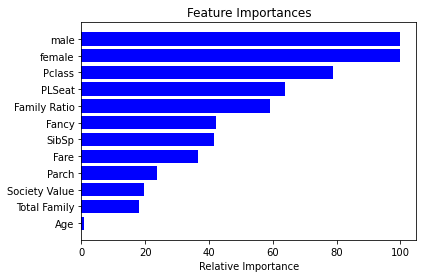

In [120]:
import matplotlib.pyplot as plt
features = x_train_df1.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3>Shap Summary : Iteration 1</h3>

In [121]:
import shap
masker = shap.maskers.Independent(data=x_test_df1)

explainer = shap.Explainer(
    clf, masker=masker, feature_names=x_train_df1.columns, algorithm="linear"
).shap_values(x_train_df1)


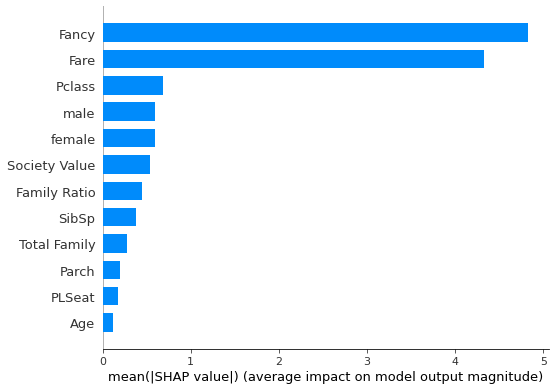

In [122]:
shap.summary_plot(explainer, x_train_df1, plot_type="bar")

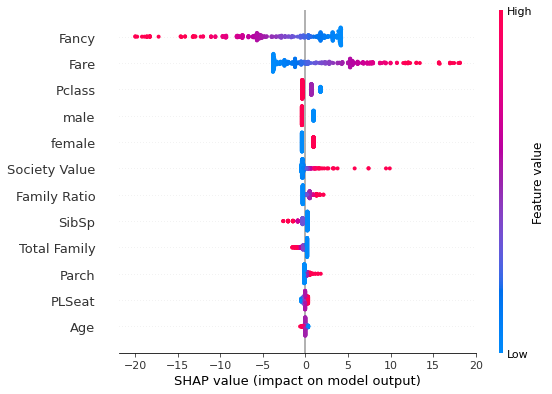

In [123]:
shap.summary_plot(explainer, x_train_df1)

<h3>Log Loss : Iteration 1</h3>

In [124]:
probs1 = clf.predict_proba(x_test_df1)
probs1

array([[1.09843383e-03, 9.98901566e-01],
       [8.86741494e-01, 1.13258506e-01],
       [1.13238376e-01, 8.86761624e-01],
       [9.27054126e-01, 7.29458738e-02],
       [7.58603811e-01, 2.41396189e-01],
       [9.97027721e-01, 2.97227939e-03],
       [3.70768924e-01, 6.29231076e-01],
       [8.77970475e-01, 1.22029525e-01],
       [8.92436654e-01, 1.07563346e-01],
       [9.39934560e-01, 6.00654396e-02],
       [8.47220011e-01, 1.52779989e-01],
       [6.88661018e-01, 3.11338982e-01],
       [9.48566927e-02, 9.05143307e-01],
       [9.58196991e-01, 4.18030090e-02],
       [7.59631318e-01, 2.40368682e-01],
       [8.81318288e-01, 1.18681712e-01],
       [5.36057940e-01, 4.63942060e-01],
       [6.95683564e-01, 3.04316436e-01],
       [4.82885516e-02, 9.51711448e-01],
       [4.17557462e-01, 5.82442538e-01],
       [6.55871269e-01, 3.44128731e-01],
       [6.36088851e-01, 3.63911149e-01],
       [6.76960030e-01, 3.23039970e-01],
       [8.37454802e-01, 1.62545198e-01],
       [3.946908

In [125]:
from sklearn.metrics import log_loss
loss1 = log_loss(y_test_df1, probs1)
print("Logloss: %.2f" % (loss1))

Logloss: 0.60


<h3>Accuracy : Iteration 1</h3>

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df1, y_pred_df1)

0.734375

<h3>Confusion Matrix : Iteration 1</h3>

In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df1, y_pred_df1)

In [128]:
cm

array([[107,  27],
       [ 24,  34]])

In [129]:
tn, fp, fn, tp = cm.ravel()

In [130]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  107
False Positives :  27
False Negatives :  24
True Positives :  34


<h3>Area Under Curve (AUC) : Iteration 1</h3>

AUC - Test Set: 76.11%


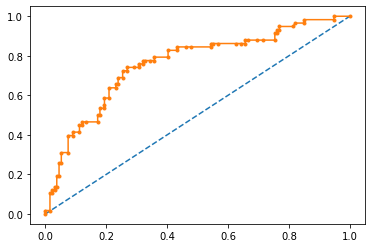

In [131]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y1 = probs1[:, 1]
auc1 = roc_auc_score(y_test_df1, probs_y1)
print('AUC - Test Set: %.2f%%' % (auc1*100))
fpr, tpr, thresholds = roc_curve(y_test_df1, probs_y1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 1</h3>

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df1,y_pred_df1))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       134
           1       0.56      0.59      0.57        58

    accuracy                           0.73       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.74      0.73      0.74       192



<hr>

<h3>Preliminary Train-Test Split : Iteration 2</h3>

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train_df2, x_test_df2, y_train_df2, y_test_df2 = train_test_split(train_df_supervised1, y_supervised, test_size=0.33, random_state=42)

In [135]:
x_train_df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
160,2.782857,31.946094,0.205714,0.320000,13.300929,0.782857,0.217143,0.525714,16.083786,2.594450,0.251429,0.588000
192,2.137143,22.782857,0.400000,0.251429,16.439073,0.520000,0.480000,0.651429,18.576216,2.489859,0.425714,0.781143
480,2.902857,28.773097,1.302857,0.668571,19.410644,0.548571,0.451429,1.971429,22.313501,3.005312,0.826667,0.631429
10,2.382857,24.360000,0.622857,0.805714,20.153463,0.234286,0.765714,1.428571,22.536321,2.379620,0.670476,0.768000
753,2.697143,16.996914,0.268571,0.417143,11.215679,0.965714,0.034286,0.685714,13.912822,6.310877,0.342857,0.738857


In [136]:
y_train_df2.head()

160    0
192    1
480    0
10     1
753    0
Name: Survived, dtype: int64

In [137]:
x_test_df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
386,2.634286,22.346094,0.914286,0.485714,17.591017,0.600000,0.400000,1.400000,20.225302,11.169254,0.432381,0.730286
810,2.600000,28.196686,0.257143,0.302857,15.067267,0.897143,0.102857,0.560000,17.667267,4.772306,0.228571,0.575429
866,1.914286,31.098155,0.234286,0.051429,21.475749,0.531429,0.468571,0.285714,23.390034,0.903479,0.234286,0.590286
709,1.651429,33.529407,0.182857,0.200000,26.924427,0.634286,0.365714,0.382857,28.575855,0.956846,0.182857,0.540000
541,2.245714,23.292440,1.800000,1.234286,31.618714,0.400000,0.600000,3.034286,33.864429,2.112986,1.099048,0.700571


In [138]:
y_test_df2.head()

386    0
810    0
866    1
709    1
541    0
Name: Survived, dtype: int64

<h3>Model Training : Iteration 2</h3>

In [139]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', penalty='l2')

In [140]:
clf.fit(x_train_df2, y_train_df2)

LogisticRegression()

<h3>Model Testing : Iteration 2</h3>

In [141]:
y_pred_df2 = clf.predict(x_test_df2)

In [142]:
y_pred_df2

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

<h3>Output to unseen data available in 'test.csv' from Iteration 2</h3>

In [143]:
clf.predict(test_df_supervised)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

<h3>Feature Importances : Iteration 2</h3>

In [144]:
importances = abs(clf.coef_[0])
importances = 100.0 * (importances / importances.max())
indices = np.argsort(importances)

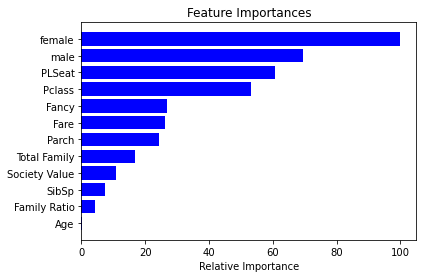

In [145]:
import matplotlib.pyplot as plt
features = x_train_df2.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3>Shap Summary : Iteration 2</h3>

In [146]:
import shap
masker = shap.maskers.Independent(data=x_test_df2)

explainer = shap.Explainer(
    clf, masker=masker, feature_names=x_train_df2.columns, algorithm="linear"
).shap_values(x_train_df2)


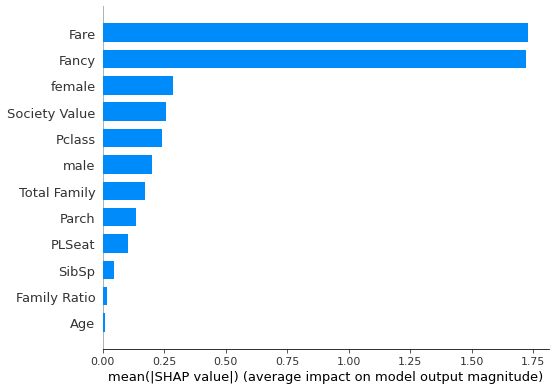

In [147]:
shap.summary_plot(explainer, x_train_df2, plot_type="bar")

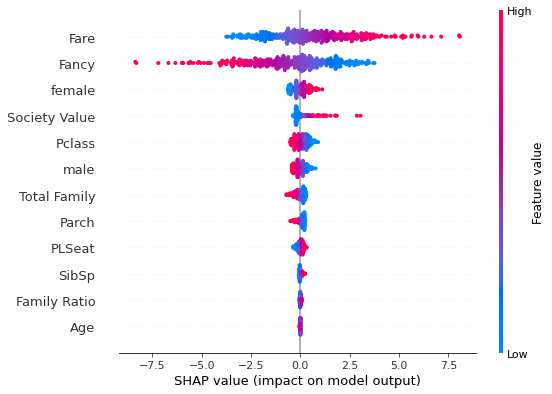

In [148]:
shap.summary_plot(explainer, x_train_df2)

<h3>Log Loss : Iteration 2</h3>

In [149]:
probs2 = clf.predict_proba(x_test_df2)
probs2

array([[0.24007349, 0.75992651],
       [0.70205037, 0.29794963],
       [0.35475499, 0.64524501],
       [0.3934264 , 0.6065736 ],
       [0.57836016, 0.42163984],
       [0.91174575, 0.08825425],
       [0.69517464, 0.30482536],
       [0.52886793, 0.47113207],
       [0.8589217 , 0.1410783 ],
       [0.88179807, 0.11820193],
       [0.63586358, 0.36413642],
       [0.81064777, 0.18935223],
       [0.43556124, 0.56443876],
       [0.70534357, 0.29465643],
       [0.72624794, 0.27375206],
       [0.52184385, 0.47815615],
       [0.62466511, 0.37533489],
       [0.51096589, 0.48903411],
       [0.29247303, 0.70752697],
       [0.52249666, 0.47750334],
       [0.4841649 , 0.5158351 ],
       [0.60373834, 0.39626166],
       [0.47041361, 0.52958639],
       [0.70507427, 0.29492573],
       [0.31158515, 0.68841485],
       [0.83609418, 0.16390582],
       [0.27408986, 0.72591014],
       [0.69751999, 0.30248001],
       [0.92520571, 0.07479429],
       [0.82904399, 0.17095601],
       [0.

In [150]:
from sklearn.metrics import log_loss
loss2 = log_loss(y_test_df2, probs2)
print("Logloss: %.2f" % (loss2))

Logloss: 0.61


<h3>Accuracy : Iteration 2</h3>

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df2, y_pred_df2)

0.703125

<h3>Confusion Matrix : Iteration 2</h3>

In [152]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df2, y_pred_df2)

In [153]:
cm

array([[113,  21],
       [ 36,  22]])

In [154]:
tn, fp, fn, tp = cm.ravel()

In [155]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  113
False Positives :  21
False Negatives :  36
True Positives :  22


<h3>Area Under Curve (AUC) : Iteration 2</h3>

AUC - Test Set: 64.94%


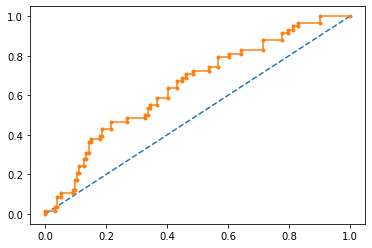

In [156]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y2 = probs2[:, 1]
auc2 = roc_auc_score(y_test_df2, probs_y2)
print('AUC - Test Set: %.2f%%' % (auc2*100))
fpr, tpr, thresholds = roc_curve(y_test_df2, probs_y2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 2</h3>

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df2,y_pred_df2))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       134
           1       0.51      0.38      0.44        58

    accuracy                           0.70       192
   macro avg       0.64      0.61      0.62       192
weighted avg       0.68      0.70      0.69       192



<hr>

<h3>Preliminary Train-Test Split : Iteration 3</h3>

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x_train_df3, x_test_df3, y_train_df3, y_test_df3 = train_test_split(train_df_supervised2, y_supervised, test_size=0.33, random_state=42)

In [160]:
x_train_df3.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
114,0.779301,1.147137,-0.529666,0.658044,-0.199141,0.718127,-0.718127,0.027553,-0.151513,-0.284008,0.045200,-1.742255
141,0.779301,-0.712109,0.469281,-0.489569,-0.986157,-1.392511,1.392511,0.027553,-0.966979,-0.257388,0.791519,1.062097
318,0.779301,-1.455808,4.465070,1.805657,2.740548,0.718127,-0.718127,3.856266,2.894446,0.707620,2.781701,1.462719
7,0.779301,-1.827657,0.469281,0.658044,-0.141875,-1.392511,1.392511,0.665672,-0.092176,0.587421,0.791519,1.462719
494,0.779301,-0.414630,-0.529666,-0.489569,-0.982187,0.718127,-0.718127,-0.610566,-0.962865,-0.276316,-0.701118,-0.139768


In [161]:
y_train_df3.head()

160    0
192    1
480    0
10     1
753    0
Name: Survived, dtype: int64

In [162]:
x_test_df3.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
250,0.779301,-2.050766,4.465070,1.805657,2.740548,0.718127,-0.718127,3.856266,2.894446,9.314499,2.781701,1.462719
523,0.779301,-0.191520,-0.529666,-0.489569,-0.982979,0.718127,-0.718127,-0.610566,-0.963686,-0.286984,-0.701118,-0.139768
560,-0.626354,-0.117150,0.469281,-0.489569,-0.413099,-1.392511,1.392511,0.027553,-0.472100,-0.254270,0.791519,0.661476
465,0.779301,0.083583,0.469281,0.658044,-0.280670,0.718127,-0.718127,0.665672,-0.235988,-0.249029,0.791519,-0.139768
355,0.779301,-1.455808,3.466122,1.805657,1.249228,-1.392511,1.392511,3.218147,1.349215,0.370740,2.284155,1.462719


In [163]:
y_test_df3.head()

386    0
810    0
866    1
709    1
541    0
Name: Survived, dtype: int64

<h3>Model Training : Iteration 3</h3>

In [164]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', C=2.0)

In [165]:
clf.fit(x_train_df3, y_train_df3)

LogisticRegression(C=2.0, solver='liblinear')

<h3>Model Testing : Iteration 3</h3>

In [166]:
y_pred_df3 = clf.predict(x_test_df3)

In [167]:
y_pred_df3

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

<h3>Output to unseen data available in 'test.csv' from Iteration 3</h3>

In [168]:
clf.predict(test_df_supervised)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<h3>Feature Importances : Iteration 3</h3>


In [169]:
importances = abs(clf.coef_[0])
importances = 100.0 * (importances / importances.max())
indices = np.argsort(importances)

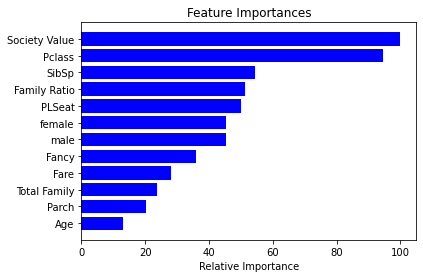

In [170]:
import matplotlib.pyplot as plt
features = x_train_df3.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3>Shap Summary : Iteration 3</h3>

In [171]:
import shap
masker = shap.maskers.Independent(data=x_test_df3)

explainer = shap.Explainer(
    clf, masker=masker, feature_names=x_train_df3.columns, algorithm="linear"
).shap_values(x_train_df3)


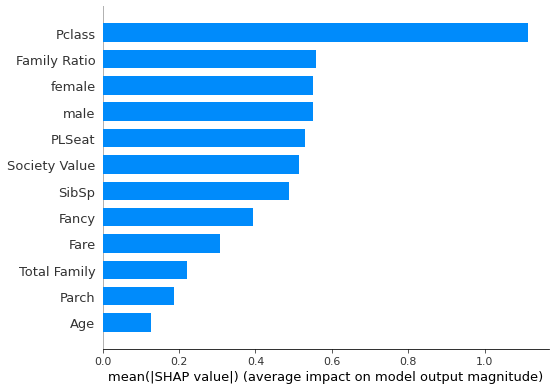

In [172]:
shap.summary_plot(explainer, x_train_df3, plot_type="bar")

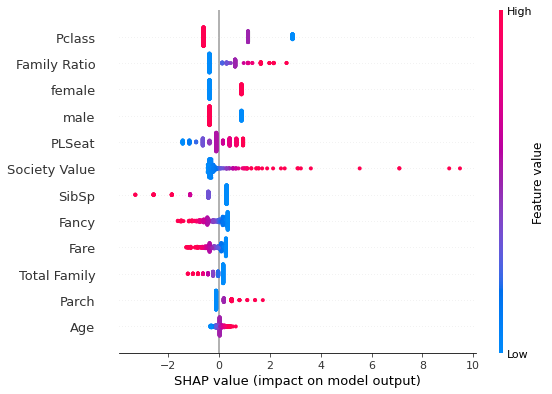

In [173]:
shap.summary_plot(explainer, x_train_df3)

<h3>Log Loss : Iteration 3</h3>

In [174]:
probs3 = clf.predict_proba(x_test_df3)
probs3

array([[2.52971803e-03, 9.97470282e-01],
       [9.00590832e-01, 9.94091683e-02],
       [9.14494291e-02, 9.08550571e-01],
       [9.24800432e-01, 7.51995678e-02],
       [7.91241821e-01, 2.08758179e-01],
       [9.97466963e-01, 2.53303717e-03],
       [3.71397126e-01, 6.28602874e-01],
       [9.04141534e-01, 9.58584661e-02],
       [8.57936456e-01, 1.42063544e-01],
       [9.43287152e-01, 5.67128479e-02],
       [8.59454125e-01, 1.40545875e-01],
       [6.49479315e-01, 3.50520685e-01],
       [7.70745841e-02, 9.22925416e-01],
       [9.67849149e-01, 3.21508506e-02],
       [7.39111381e-01, 2.60888619e-01],
       [9.02505331e-01, 9.74946694e-02],
       [5.18118212e-01, 4.81881788e-01],
       [6.80369271e-01, 3.19630729e-01],
       [4.17542195e-02, 9.58245781e-01],
       [3.81421852e-01, 6.18578148e-01],
       [7.14382651e-01, 2.85617349e-01],
       [6.50302618e-01, 3.49697382e-01],
       [6.88490691e-01, 3.11509309e-01],
       [8.09470319e-01, 1.90529681e-01],
       [3.342745

In [175]:
from sklearn.metrics import log_loss
loss3 = log_loss(y_test_df3, probs3)
print("Logloss: %.2f" % (loss3))

Logloss: 0.60


<h3>Accuracy : Iteration 3</h3>

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df3, y_pred_df3)

0.7395833333333334

<h3>Confusion Matrix : Iteration 3</h3>

In [177]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df3, y_pred_df3)

In [178]:
cm

array([[106,  28],
       [ 22,  36]])

In [179]:
tn, fp, fn, tp = cm.ravel()

In [180]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  106
False Positives :  28
False Negatives :  22
True Positives :  36


<h3>Area Under Curve (AUC) : Iteration 3</h3>

AUC - Test Set: 76.20%


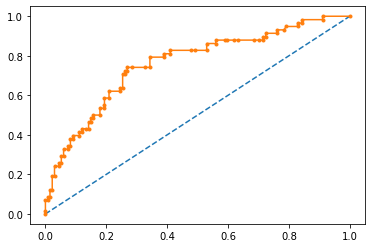

In [181]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y3 = probs3[:, 1]
auc3 = roc_auc_score(y_test_df3, probs_y3)
print('AUC - Test Set: %.2f%%' % (auc3*100))
fpr, tpr, thresholds = roc_curve(y_test_df3, probs_y3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 3</h3>

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df3,y_pred_df3))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       134
           1       0.56      0.62      0.59        58

    accuracy                           0.74       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.75      0.74      0.74       192



<hr>

<h3>Preliminary Train-Test Split : Iteration 4</h3>

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
x_train_df4, x_test_df4, y_train_df4, y_test_df4 = train_test_split(train_df_supervised3, y_supervised, test_size=0.33, random_state=42)

In [185]:
x_train_df4.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
114,0.059148,0.867511,0.000000,0.019716,0.317430,0.019716,0.000000,0.019716,0.376579,0.008559,0.009858,0.003943
141,0.127384,0.806768,0.042461,0.000000,0.333501,0.000000,0.042461,0.042461,0.460885,0.024257,0.042461,0.038215
318,0.042875,0.128626,0.071459,0.028584,0.670287,0.014292,0.000000,0.100043,0.713162,0.079240,0.033348,0.014292
7,0.111399,0.148532,0.037133,0.037133,0.620122,0.000000,0.037133,0.074266,0.731521,0.182880,0.037133,0.037133
494,0.111753,0.856775,0.000000,0.000000,0.294127,0.037251,0.000000,0.000000,0.405880,0.017647,0.000000,0.022351


In [186]:
y_train_df4.head()

160    0
192    1
480    0
10     1
753    0
Name: Survived, dtype: int64

In [187]:
x_test_df4.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
250,0.035172,0.011724,0.058621,0.023448,0.549863,0.011724,0.000000,0.082069,0.585035,0.585035,0.027356,0.011724
523,0.101869,0.882861,0.000000,0.000000,0.267829,0.033956,0.000000,0.000000,0.369698,0.014219,0.000000,0.020374
560,0.058185,0.785494,0.029092,0.000000,0.403171,0.000000,0.029092,0.029092,0.461355,0.017087,0.029092,0.023274
465,0.078376,0.775902,0.026125,0.026125,0.398303,0.026125,0.000000,0.052251,0.476680,0.016050,0.026125,0.015675
355,0.062292,0.186876,0.083056,0.041528,0.649395,0.000000,0.020764,0.124584,0.711687,0.079076,0.041528,0.020764


In [188]:
y_test_df4.head()

386    0
810    0
866    1
709    1
541    0
Name: Survived, dtype: int64

<h3>Model Training : Iteration 4</h3>

In [189]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga', l1_ratio= '0.5', penalty='l1')

In [190]:
clf.fit(x_train_df4, y_train_df4)

LogisticRegression(l1_ratio='0.5', penalty='l1', solver='saga')

<h3>Model Testing : Iteration 4</h3>

In [191]:
y_pred_df4 = clf.predict(x_test_df4)

In [192]:
y_pred_df4

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

<h3>Output to unseen data available in 'test.csv' from Iteration 4</h3>

In [193]:
clf.predict(test_df_supervised)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<h3>Feature Importances : Iteration 4</h3>


In [194]:
importances = abs(clf.coef_[0])
importances = 100.0 * (importances / importances.max())
indices = np.argsort(importances)

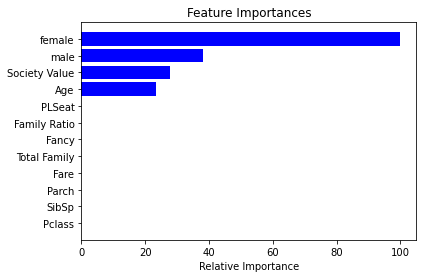

In [195]:
import matplotlib.pyplot as plt
features = x_train_df4.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3>Shap Summary : Iteration 4</h3>

In [196]:
import shap
masker = shap.maskers.Independent(data=x_test_df4)

explainer = shap.Explainer(
    clf, masker=masker, feature_names=x_train_df4.columns, algorithm="linear"
).shap_values(x_train_df4)


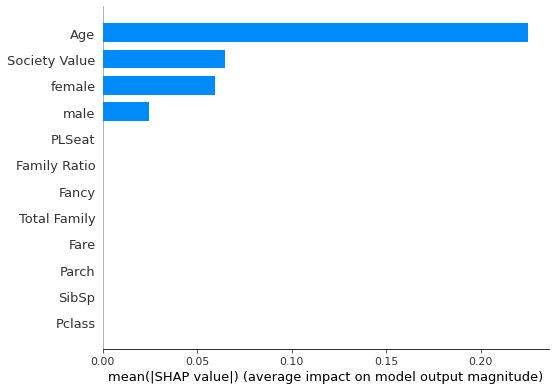

In [197]:
shap.summary_plot(explainer, x_train_df4, plot_type="bar")

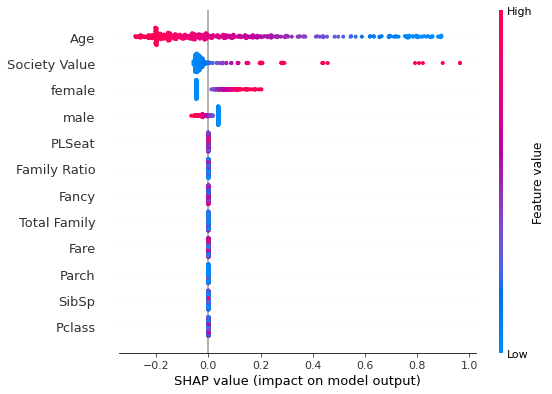

In [198]:
shap.summary_plot(explainer, x_train_df4)

<h3>Log Loss : Iteration 4</h3>

In [199]:
probs4 = clf.predict_proba(x_test_df4)
probs4

array([[0.25763795, 0.74236205],
       [0.70786998, 0.29213002],
       [0.63215556, 0.36784444],
       [0.676032  , 0.323968  ],
       [0.44041264, 0.55958736],
       [0.48822935, 0.51177065],
       [0.51211088, 0.48788912],
       [0.69580465, 0.30419535],
       [0.63270048, 0.36729952],
       [0.63398176, 0.36601824],
       [0.71880922, 0.28119078],
       [0.46073469, 0.53926531],
       [0.65298444, 0.34701556],
       [0.66001292, 0.33998708],
       [0.59040523, 0.40959477],
       [0.70180712, 0.29819288],
       [0.6391097 , 0.3608903 ],
       [0.69232615, 0.30767385],
       [0.48437288, 0.51562712],
       [0.63718184, 0.36281816],
       [0.6646526 , 0.3353474 ],
       [0.69176784, 0.30823216],
       [0.67875923, 0.32124077],
       [0.72577902, 0.27422098],
       [0.68161762, 0.31838238],
       [0.59463818, 0.40536182],
       [0.61585526, 0.38414474],
       [0.59614103, 0.40385897],
       [0.72594759, 0.27405241],
       [0.49483765, 0.50516235],
       [0.

In [200]:
from sklearn.metrics import log_loss
loss4 = log_loss(y_test_df4, probs4)
print("Logloss: %.2f" % (loss4))

Logloss: 0.59


<h3>Accuracy : Iteration 4</h3>

In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df4, y_pred_df4)

0.6875

<h3>Confusion Matrix : Iteration 4</h3>

In [202]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df4, y_pred_df4)

In [203]:
cm

array([[123,  11],
       [ 49,   9]])

In [204]:
tn, fp, fn, tp = cm.ravel()

In [205]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  123
False Positives :  11
False Negatives :  49
True Positives :  9


<h3>Area Under Curve (AUC) : Iteration 4</h3>

AUC - Test Set: 72.60%


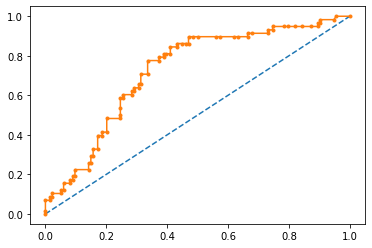

In [206]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y4 = probs4[:, 1]
auc4 = roc_auc_score(y_test_df4, probs_y4)
print('AUC - Test Set: %.2f%%' % (auc4*100))
fpr, tpr, thresholds = roc_curve(y_test_df4, probs_y4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 4</h3>

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df4,y_pred_df4))

              precision    recall  f1-score   support

           0       0.72      0.92      0.80       134
           1       0.45      0.16      0.23        58

    accuracy                           0.69       192
   macro avg       0.58      0.54      0.52       192
weighted avg       0.64      0.69      0.63       192



<center><h2>Naive Bayes</h2></center>
* Supervised learning models: Choose 2 supervised learning models from W3, W4, W5

<hr>

<h3>Preliminary Train-Test Split : Iteration 1</h3>

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
x_train_df1, x_test_df1, y_train_df1, y_test_df1 = train_test_split(train_df_supervised, y_supervised, test_size=0.33, random_state=42)

In [210]:
x_train_df1.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
160,3,44.0,0,1,16.1000,1,0,1,19.1000,0.434091,0.500000,0.2
192,3,19.0,1,0,7.8542,0,1,1,10.8542,0.571274,1.000000,0.9
480,3,9.0,5,2,46.9000,1,0,7,49.9000,5.544444,2.333333,1.0
10,3,4.0,1,1,16.7000,0,1,2,19.7000,4.925000,1.000000,1.0
753,3,23.0,0,0,7.8958,1,0,0,10.8958,0.473730,0.000000,0.6


In [211]:
y_train_df1.head()

160    0
192    1
480    0
10     1
753    0
Name: Survived, dtype: int64

In [212]:
x_test_df1.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
386,3,1.000000,5,2,46.9000,1,0,7,49.9000,49.900000,2.333333,1.0
810,3,26.000000,0,0,7.8875,1,0,0,10.8875,0.418750,0.000000,0.6
866,2,27.000000,1,0,13.8583,0,1,1,15.8583,0.587344,1.000000,0.8
709,3,29.699118,1,1,15.2458,1,0,2,18.2458,0.614355,1.000000,0.6
541,3,9.000000,4,2,31.2750,0,1,6,34.2750,3.808333,2.000000,1.0


In [213]:
y_test_df1.head()

386    0
810    0
866    1
709    1
541    0
Name: Survived, dtype: int64

<h3>Model Training : Iteration 1</h3>

In [214]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing=1.0)

In [215]:
clf.fit(x_train_df1, y_train_df1)

GaussianNB(var_smoothing=1.0)

<h3>Model Testing : Iteration 1</h3>

In [216]:
y_pred_df1 = clf.predict(x_test_df1)

In [217]:
y_pred_df1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

<h3>Output to unseen data available in 'test.csv' from Iteration 1</h3>

In [218]:
clf.predict(test_df_supervised)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<h3>Feature Importances : Iteration 1</h3>

In [219]:
from sklearn.inspection import permutation_importance
importances = permutation_importance(clf, x_test_df1, y_test_df1)
importances_mean = abs(importances.importances_mean)
indices = np.argsort(importances.importances_mean)

<h3>Shap Summary : Iteration 1</h3>

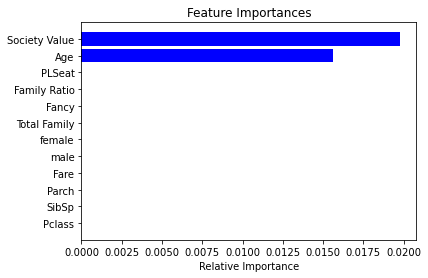

In [220]:
import matplotlib.pyplot as plt
features = x_train_df1.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_mean[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [221]:
import shap
explainer = shap.KernelExplainer(clf.predict_proba, x_train_df1, link="logit")
shap_values = explainer.shap_values(x_test_df1, nsample=shap.sample(x_test_df1, 100))

Using 387 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/192 [00:00<?, ?it/s]

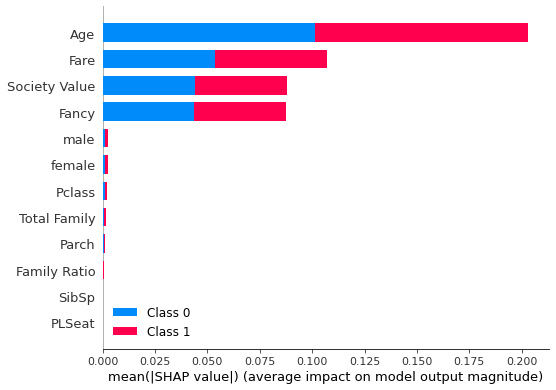

In [222]:
shap.summary_plot(shap_values, x_train_df1, plot_type="bar")

<h3>Log Loss : Iteration 1</h3>

In [223]:
probs1 = clf.predict_proba(x_test_df1)
probs1

array([[0.20767909, 0.79232091],
       [0.68092014, 0.31907986],
       [0.66270041, 0.33729959],
       [0.66454322, 0.33545678],
       [0.54618486, 0.45381514],
       [0.55938487, 0.44061513],
       [0.59236865, 0.40763135],
       [0.66658694, 0.33341306],
       [0.63565238, 0.36434762],
       [0.63990037, 0.36009963],
       [0.69216912, 0.30783088],
       [0.53365259, 0.46634741],
       [0.662195  , 0.337805  ],
       [0.65670907, 0.34329093],
       [0.63653172, 0.36346828],
       [0.67288082, 0.32711918],
       [0.6452434 , 0.3547566 ],
       [0.67399104, 0.32600896],
       [0.5712729 , 0.4287271 ],
       [0.66604263, 0.33395737],
       [0.65850345, 0.34149655],
       [0.6675421 , 0.3324579 ],
       [0.6617139 , 0.3382861 ],
       [0.68744534, 0.31255466],
       [0.6992792 , 0.3007208 ],
       [0.62322131, 0.37677869],
       [0.65131407, 0.34868593],
       [0.64000767, 0.35999233],
       [0.71075229, 0.28924771],
       [0.56002311, 0.43997689],
       [0.

In [224]:
from sklearn.metrics import log_loss
loss1 = log_loss(y_test_df1, probs1)
print("Logloss: %.2f" % (loss1))

Logloss: 0.61


<h3>Accuracy : Iteration 1</h3>

In [225]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df1, y_pred_df1)

0.703125

<h3>Confusion Matrix : Iteration 1</h3>

In [226]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df1, y_pred_df1)

In [227]:
cm

array([[129,   5],
       [ 52,   6]])

In [228]:
tn, fp, fn, tp = cm.ravel()

In [229]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  129
False Positives :  5
False Negatives :  52
True Positives :  6


<h3>Area Under Curve (AUC) : Iteration 1</h3>

AUC - Test Set: 65.10%


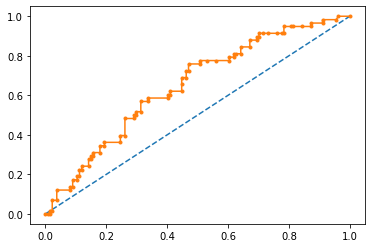

In [230]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y1 = probs1[:, 1]
auc1 = roc_auc_score(y_test_df1, probs_y1)
print('AUC - Test Set: %.2f%%' % (auc1*100))
fpr, tpr, thresholds = roc_curve(y_test_df1, probs_y1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 1</h3>

In [231]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df1,y_pred_df1))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       134
           1       0.55      0.10      0.17        58

    accuracy                           0.70       192
   macro avg       0.63      0.53      0.50       192
weighted avg       0.66      0.70      0.62       192



<hr>

<h3>Preliminary Train-Test Split : Iteration 2</h3>

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
x_train_df2, x_test_df2, y_train_df2, y_test_df2 = train_test_split(train_df_supervised1, y_supervised, test_size=0.33, random_state=42)

In [234]:
x_train_df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
160,2.782857,31.946094,0.205714,0.320000,13.300929,0.782857,0.217143,0.525714,16.083786,2.594450,0.251429,0.588000
192,2.137143,22.782857,0.400000,0.251429,16.439073,0.520000,0.480000,0.651429,18.576216,2.489859,0.425714,0.781143
480,2.902857,28.773097,1.302857,0.668571,19.410644,0.548571,0.451429,1.971429,22.313501,3.005312,0.826667,0.631429
10,2.382857,24.360000,0.622857,0.805714,20.153463,0.234286,0.765714,1.428571,22.536321,2.379620,0.670476,0.768000
753,2.697143,16.996914,0.268571,0.417143,11.215679,0.965714,0.034286,0.685714,13.912822,6.310877,0.342857,0.738857


In [235]:
y_train_df2.head()

160    0
192    1
480    0
10     1
753    0
Name: Survived, dtype: int64

In [236]:
x_test_df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
386,2.634286,22.346094,0.914286,0.485714,17.591017,0.600000,0.400000,1.400000,20.225302,11.169254,0.432381,0.730286
810,2.600000,28.196686,0.257143,0.302857,15.067267,0.897143,0.102857,0.560000,17.667267,4.772306,0.228571,0.575429
866,1.914286,31.098155,0.234286,0.051429,21.475749,0.531429,0.468571,0.285714,23.390034,0.903479,0.234286,0.590286
709,1.651429,33.529407,0.182857,0.200000,26.924427,0.634286,0.365714,0.382857,28.575855,0.956846,0.182857,0.540000
541,2.245714,23.292440,1.800000,1.234286,31.618714,0.400000,0.600000,3.034286,33.864429,2.112986,1.099048,0.700571


In [237]:
y_test_df2.head()

386    0
810    0
866    1
709    1
541    0
Name: Survived, dtype: int64

<h3>Model Training : Iteration 2</h3>

In [238]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing=2.0)

In [239]:
clf.fit(x_train_df2, y_train_df2)

GaussianNB(var_smoothing=2.0)

<h3>Model Testing : Iteration 2</h3>

In [240]:
y_pred_df2 = clf.predict(x_test_df2)

In [241]:
y_pred_df2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<h3>Output to unseen data available in 'test.csv' from Iteration 2</h3>

In [242]:
clf.predict(test_df_supervised)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<h3>Feature Importances : Iteration 2</h3>

In [243]:
from sklearn.inspection import permutation_importance
importances = permutation_importance(clf, x_test_df2, y_test_df2)
importances_mean = abs(importances.importances_mean)
indices = np.argsort(importances.importances_mean)

<h3>Shap Summary : Iteration 2</h3>

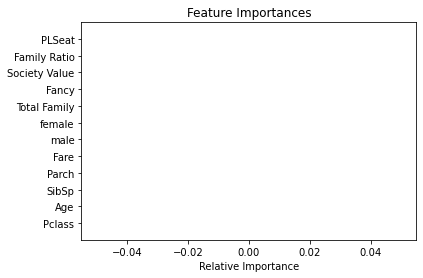

In [244]:
import matplotlib.pyplot as plt
features = x_train_df2.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_mean[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [245]:
import shap
explainer = shap.KernelExplainer(clf.predict_proba, x_train_df2, link="logit")
shap_values = explainer.shap_values(x_test_df2, nsample=shap.sample(x_test_df1, 100))

Using 387 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/192 [00:00<?, ?it/s]

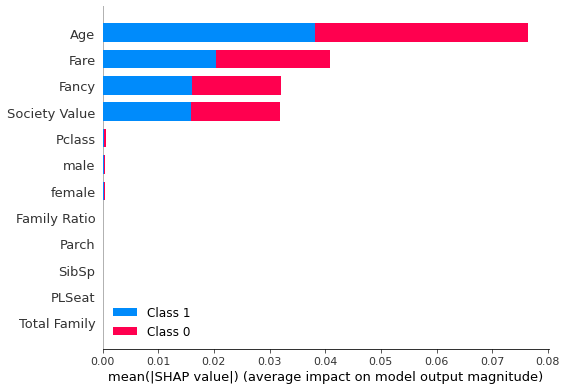

In [246]:
shap.summary_plot(shap_values, x_train_df2, plot_type="bar")

<h3>Log Loss : Iteration 2</h3>

In [247]:
probs2 = clf.predict_proba(x_test_df2)
probs2

array([[0.59744648, 0.40255352],
       [0.63534202, 0.36465798],
       [0.63234091, 0.36765909],
       [0.6258439 , 0.3741561 ],
       [0.59935438, 0.40064562],
       [0.61517666, 0.38482334],
       [0.62248776, 0.37751224],
       [0.61724791, 0.38275209],
       [0.63219408, 0.36780592],
       [0.65033118, 0.34966882],
       [0.62939429, 0.37060571],
       [0.62025052, 0.37974948],
       [0.65079136, 0.34920864],
       [0.61543578, 0.38456422],
       [0.63656547, 0.36343453],
       [0.60406227, 0.39593773],
       [0.6186794 , 0.3813206 ],
       [0.62707422, 0.37292578],
       [0.60122045, 0.39877955],
       [0.6454522 , 0.3545478 ],
       [0.63343193, 0.36656807],
       [0.62199308, 0.37800692],
       [0.63327192, 0.36672808],
       [0.654271  , 0.345729  ],
       [0.63255284, 0.36744716],
       [0.63794818, 0.36205182],
       [0.6323994 , 0.3676006 ],
       [0.64690485, 0.35309515],
       [0.66772593, 0.33227407],
       [0.62046963, 0.37953037],
       [0.

In [248]:
from sklearn.metrics import log_loss
loss2 = log_loss(y_test_df2, probs2)
print("Logloss: %.2f" % (loss2))

Logloss: 0.62


<h3>Accuracy : Iteration 2</h3>

In [249]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df2, y_pred_df2)

0.6979166666666666

<h3>Confusion Matrix : Iteration 2</h3>

In [250]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df2, y_pred_df2)

In [251]:
cm

array([[134,   0],
       [ 58,   0]])

In [252]:
tn, fp, fn, tp = cm.ravel()

In [253]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  134
False Positives :  0
False Negatives :  58
True Positives :  0


<h3>Area Under Curve (AUC) : Iteration 2</h3>

AUC - Test Set: 55.30%


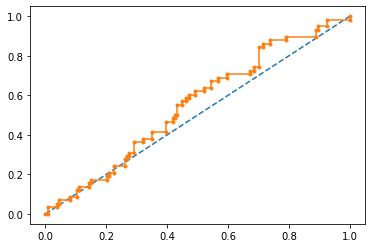

In [254]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y2 = probs2[:, 1]
auc2 = roc_auc_score(y_test_df2, probs_y2)
print('AUC - Test Set: %.2f%%' % (auc2*100))
fpr, tpr, thresholds = roc_curve(y_test_df2, probs_y2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 2</h3>

In [255]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df2,y_pred_df2))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       134
           1       0.00      0.00      0.00        58

    accuracy                           0.70       192
   macro avg       0.35      0.50      0.41       192
weighted avg       0.49      0.70      0.57       192



<hr>

<h3>Preliminary Train-Test Split : Iteration 3</h3>

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
x_train_df3, x_test_df3, y_train_df3, y_test_df3 = train_test_split(train_df_supervised2, y_supervised, test_size=0.33, random_state=42)

In [258]:
x_train_df3.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
114,0.779301,1.147137,-0.529666,0.658044,-0.199141,0.718127,-0.718127,0.027553,-0.151513,-0.284008,0.045200,-1.742255
141,0.779301,-0.712109,0.469281,-0.489569,-0.986157,-1.392511,1.392511,0.027553,-0.966979,-0.257388,0.791519,1.062097
318,0.779301,-1.455808,4.465070,1.805657,2.740548,0.718127,-0.718127,3.856266,2.894446,0.707620,2.781701,1.462719
7,0.779301,-1.827657,0.469281,0.658044,-0.141875,-1.392511,1.392511,0.665672,-0.092176,0.587421,0.791519,1.462719
494,0.779301,-0.414630,-0.529666,-0.489569,-0.982187,0.718127,-0.718127,-0.610566,-0.962865,-0.276316,-0.701118,-0.139768


In [259]:
y_train_df3.head()

160    0
192    1
480    0
10     1
753    0
Name: Survived, dtype: int64

In [260]:
x_test_df3.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
250,0.779301,-2.050766,4.465070,1.805657,2.740548,0.718127,-0.718127,3.856266,2.894446,9.314499,2.781701,1.462719
523,0.779301,-0.191520,-0.529666,-0.489569,-0.982979,0.718127,-0.718127,-0.610566,-0.963686,-0.286984,-0.701118,-0.139768
560,-0.626354,-0.117150,0.469281,-0.489569,-0.413099,-1.392511,1.392511,0.027553,-0.472100,-0.254270,0.791519,0.661476
465,0.779301,0.083583,0.469281,0.658044,-0.280670,0.718127,-0.718127,0.665672,-0.235988,-0.249029,0.791519,-0.139768
355,0.779301,-1.455808,3.466122,1.805657,1.249228,-1.392511,1.392511,3.218147,1.349215,0.370740,2.284155,1.462719


In [261]:
y_test_df3.head()

386    0
810    0
866    1
709    1
541    0
Name: Survived, dtype: int64

<h3>Model Training : Iteration 3</h3>

In [262]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing=5.0)

In [263]:
clf.fit(x_train_df3, y_train_df3)

GaussianNB(var_smoothing=5.0)

<h3>Model Testing : Iteration 3</h3>

In [264]:
y_pred_df3 = clf.predict(x_test_df3)

In [265]:
y_pred_df3

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

<h3>Output to unseen data available in 'test.csv' from Iteration 3</h3>

In [266]:
clf.predict(test_df_supervised)

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

<h3>Feature Importances : Iteration 3</h3>

In [267]:
from sklearn.inspection import permutation_importance
importances = permutation_importance(clf, x_test_df3, y_test_df3)
importances_mean = abs(importances.importances_mean)
indices = np.argsort(importances.importances_mean)

<h3>Shap Summary : Iteration 3</h3>

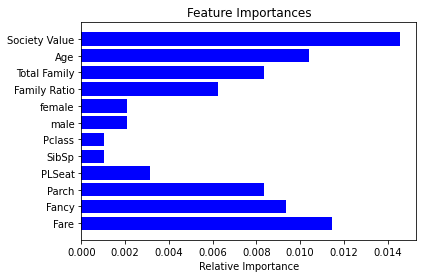

In [268]:
import matplotlib.pyplot as plt
features = x_train_df3.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_mean[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [269]:
import shap
explainer = shap.KernelExplainer(clf.predict_proba, x_train_df3, link="logit")
shap_values = explainer.shap_values(x_test_df3, nsample=shap.sample(x_test_df3, 100))

Using 387 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/192 [00:00<?, ?it/s]

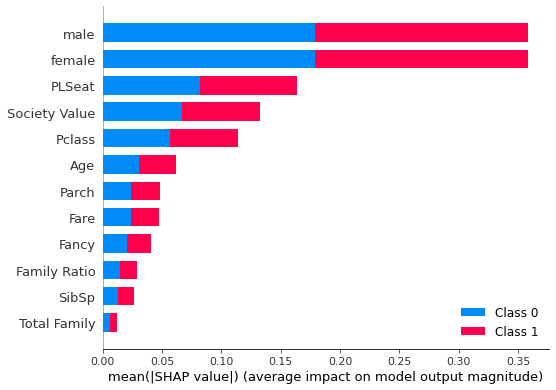

In [270]:
shap.summary_plot(shap_values, x_train_df1, plot_type="bar")

<h3>Log Loss : Iteration 3</h3>

In [271]:
probs3 = clf.predict_proba(x_test_df3)
probs3

array([[0.19280834, 0.80719166],
       [0.74832982, 0.25167018],
       [0.51645978, 0.48354022],
       [0.7275532 , 0.2724468 ],
       [0.47595746, 0.52404254],
       [0.68415584, 0.31584416],
       [0.45599659, 0.54400341],
       [0.74458092, 0.25541908],
       [0.6943524 , 0.3056476 ],
       [0.71058927, 0.28941073],
       [0.7799342 , 0.2200658 ],
       [0.62088452, 0.37911548],
       [0.53257485, 0.46742515],
       [0.74001538, 0.25998462],
       [0.52445768, 0.47554232],
       [0.74619327, 0.25380673],
       [0.69889762, 0.30110238],
       [0.72739787, 0.27260213],
       [0.43046289, 0.56953711],
       [0.54059405, 0.45940595],
       [0.7353506 , 0.2646494 ],
       [0.72607545, 0.27392455],
       [0.72370485, 0.27629515],
       [0.78611936, 0.21388064],
       [0.56636906, 0.43363094],
       [0.68465399, 0.31534601],
       [0.53216102, 0.46783898],
       [0.52721713, 0.47278287],
       [0.79935529, 0.20064471],
       [0.66073274, 0.33926726],
       [0.

In [272]:
from sklearn.metrics import log_loss
loss3 = log_loss(y_test_df3, probs3)
print("Logloss: %.2f" % (loss3))

Logloss: 0.56


<h3>Accuracy : Iteration 3</h3>

In [273]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df3, y_pred_df3)

0.703125

<h3>Confusion Matrix : Iteration 3</h3>

In [274]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df3, y_pred_df3)

In [275]:
cm

array([[123,  11],
       [ 46,  12]])

In [276]:
tn, fp, fn, tp = cm.ravel()

In [277]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  123
False Positives :  11
False Negatives :  46
True Positives :  12


<h3>Area Under Curve (AUC) : Iteration 3</h3>

AUC - Test Set: 73.87%


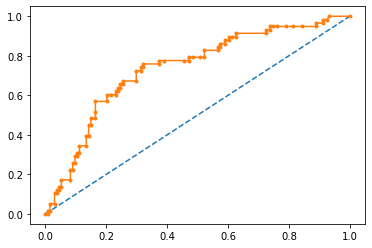

In [278]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y3 = probs3[:, 1]
auc3 = roc_auc_score(y_test_df3, probs_y3)
print('AUC - Test Set: %.2f%%' % (auc3*100))
fpr, tpr, thresholds = roc_curve(y_test_df3, probs_y3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 3</h3>

In [279]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df3,y_pred_df3))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       134
           1       0.52      0.21      0.30        58

    accuracy                           0.70       192
   macro avg       0.62      0.56      0.55       192
weighted avg       0.67      0.70      0.66       192



<hr>

<h3>Preliminary Train-Test Split : Iteration 4</h3>

In [280]:
from sklearn.model_selection import train_test_split

In [281]:
x_train_df4, x_test_df4, y_train_df4, y_test_df4 = train_test_split(train_df_supervised3, y_supervised, test_size=0.33, random_state=42)

In [282]:
x_train_df4.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
114,0.059148,0.867511,0.000000,0.019716,0.317430,0.019716,0.000000,0.019716,0.376579,0.008559,0.009858,0.003943
141,0.127384,0.806768,0.042461,0.000000,0.333501,0.000000,0.042461,0.042461,0.460885,0.024257,0.042461,0.038215
318,0.042875,0.128626,0.071459,0.028584,0.670287,0.014292,0.000000,0.100043,0.713162,0.079240,0.033348,0.014292
7,0.111399,0.148532,0.037133,0.037133,0.620122,0.000000,0.037133,0.074266,0.731521,0.182880,0.037133,0.037133
494,0.111753,0.856775,0.000000,0.000000,0.294127,0.037251,0.000000,0.000000,0.405880,0.017647,0.000000,0.022351


In [283]:
y_train_df4.head()

160    0
192    1
480    0
10     1
753    0
Name: Survived, dtype: int64

In [284]:
x_test_df4.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
250,0.035172,0.011724,0.058621,0.023448,0.549863,0.011724,0.000000,0.082069,0.585035,0.585035,0.027356,0.011724
523,0.101869,0.882861,0.000000,0.000000,0.267829,0.033956,0.000000,0.000000,0.369698,0.014219,0.000000,0.020374
560,0.058185,0.785494,0.029092,0.000000,0.403171,0.000000,0.029092,0.029092,0.461355,0.017087,0.029092,0.023274
465,0.078376,0.775902,0.026125,0.026125,0.398303,0.026125,0.000000,0.052251,0.476680,0.016050,0.026125,0.015675
355,0.062292,0.186876,0.083056,0.041528,0.649395,0.000000,0.020764,0.124584,0.711687,0.079076,0.041528,0.020764


In [285]:
y_test_df4.head()

386    0
810    0
866    1
709    1
541    0
Name: Survived, dtype: int64

<h3>Model Training : Iteration 4</h3>

In [286]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing=6.0)

In [287]:
clf.fit(x_train_df4, y_train_df4)

GaussianNB(var_smoothing=6.0)

<h3>Model Testing : Iteration 4</h3>

In [288]:
y_pred_df4 = clf.predict(x_test_df4)

In [289]:
y_pred_df4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<h3>Output to unseen data available in 'test.csv' from Iteration 4</h3>

In [290]:
clf.predict(test_df_supervised)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<h3>Feature Importances : Iteration 4</h3>

In [291]:
from sklearn.inspection import permutation_importance
importances = permutation_importance(clf, x_test_df4, y_test_df4)
importances_mean = abs(importances.importances_mean)
indices = np.argsort(importances.importances_mean)

<h3>Shap Summary : Iteration 4</h3>

In [292]:
import shap
explainer = shap.KernelExplainer(clf.predict_proba, x_train_df4, link="logit")
shap_values = explainer.shap_values(x_test_df4, nsample=shap.sample(x_test_df4, 100))

Using 387 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/192 [00:00<?, ?it/s]

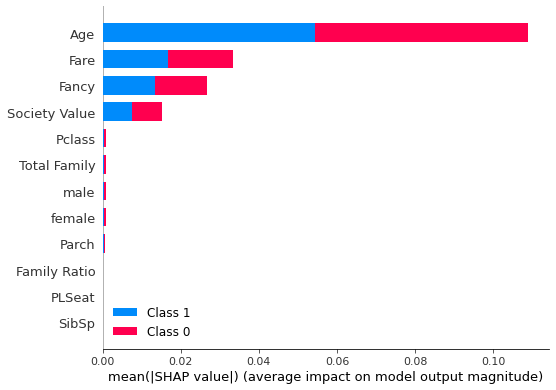

In [293]:
shap.summary_plot(shap_values, x_train_df4, plot_type="bar")

<h3>Log Loss : Iteration 4</h3>

In [294]:
probs4 = clf.predict_proba(x_test_df4)
probs4

array([[0.56254606, 0.43745394],
       [0.66241865, 0.33758135],
       [0.64912218, 0.35087782],
       [0.6486777 , 0.3513223 ],
       [0.58848533, 0.41151467],
       [0.5903536 , 0.4096464 ],
       [0.60407763, 0.39592237],
       [0.65642217, 0.34357783],
       [0.63285602, 0.36714398],
       [0.63338688, 0.36661312],
       [0.67042978, 0.32957022],
       [0.58456246, 0.41543754],
       [0.6501477 , 0.3498523 ],
       [0.6427629 , 0.3572371 ],
       [0.63048651, 0.36951349],
       [0.65926633, 0.34073367],
       [0.63516237, 0.36483763],
       [0.65515735, 0.34484265],
       [0.59716599, 0.40283401],
       [0.65009059, 0.34990941],
       [0.64458217, 0.35541783],
       [0.65433889, 0.34566111],
       [0.6492276 , 0.3507724 ],
       [0.6761348 , 0.3238652 ],
       [0.6679542 , 0.3320458 ],
       [0.62075411, 0.37924589],
       [0.64004068, 0.35995932],
       [0.63282183, 0.36717817],
       [0.6756992 , 0.3243008 ],
       [0.59312556, 0.40687444],
       [0.

In [295]:
from sklearn.metrics import log_loss
loss4 = log_loss(y_test_df4, probs4)
print("Logloss: %.2f" % (loss4))

Logloss: 0.61


<h3>Accuracy : Iteration 4</h3>

In [296]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df4, y_pred_df4)

0.6979166666666666

<h3>Confusion Matrix : Iteration 4</h3>

In [297]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df4, y_pred_df4)

In [298]:
cm

array([[134,   0],
       [ 58,   0]])

In [299]:
tn, fp, fn, tp = cm.ravel()

In [300]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  134
False Positives :  0
False Negatives :  58
True Positives :  0


<h3>Area Under Curve (AUC) : Iteration 4</h3>

AUC - Test Set: 67.20%


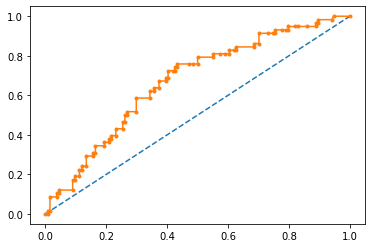

In [301]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y4 = probs4[:, 1]
auc4 = roc_auc_score(y_test_df4, probs_y4)
print('AUC - Test Set: %.2f%%' % (auc4*100))
fpr, tpr, thresholds = roc_curve(y_test_df4, probs_y4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 4</h3>

In [302]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df4,y_pred_df4))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       134
           1       0.00      0.00      0.00        58

    accuracy                           0.70       192
   macro avg       0.35      0.50      0.41       192
weighted avg       0.49      0.70      0.57       192



<hr>

<center><h2>XGBoost</h2></center>
* Advanced models: choose 1 from XGBoost W12 or Neural Network W13 or Deep learning W14 to build your supervised learning models

<hr>

<h3>Preliminary Train-Test Split : Iteration 1</h3>

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
x_train_df1, x_test_df1, y_train_df1, y_test_df1 = train_test_split(train_df_advanced, y_advanced, test_size=0.33, random_state=42)

In [305]:
x_train_df1.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
6,1,54.0,0,0,51.8625,1,0,0,52.8625,0.978935,0.0,0.1
718,3,NaN,0,0,15.5000,1,0,0,18.5000,NaN,0.0,0.0
685,2,25.0,1,2,41.5792,1,0,3,43.5792,1.743168,1.0,0.6
73,3,26.0,1,0,14.4542,1,0,1,17.4542,0.671315,1.0,0.6
882,3,22.0,0,0,10.5167,0,1,0,13.5167,0.614395,0.0,0.8


In [306]:
y_train_df1.head()

6      0
718    0
685    0
73     0
882    0
Name: Survived, dtype: int64

In [307]:
x_test_df1.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
709,3,NaN,1,1,15.2458,1,0,2,18.2458,NaN,1.0,0.0
439,2,31.0,0,0,10.5000,1,0,0,12.5000,0.403226,0.0,0.4
840,3,20.0,0,0,7.9250,1,0,0,10.9250,0.546250,0.0,0.9
720,2,6.0,0,1,33.0000,0,1,1,35.0000,5.833333,0.5,1.0
39,3,14.0,1,0,11.2417,0,1,1,14.2417,1.017264,1.0,0.9


In [308]:
y_test_df1.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

<h3>Model Training : Iteration 1</h3>

In [309]:
import xgboost as xgb
clf = xgb.XGBClassifier(use_label_encoder=False, max_depth = 8)

In [310]:
clf.fit(x_train_df1, y_train_df1)

[21:29:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

<h3>Model Testing : Iteration 1</h3>

In [311]:
y_pred_df1 = clf.predict(x_test_df1)

In [312]:
y_pred_df1

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

<h3>Output to unseen data available in 'test.csv' from Iteration 1</h3>

In [313]:
clf.predict(test_df_advanced)

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

<h3>Log Loss : Iteration 1</h3>

In [314]:
probs1 = clf.predict_proba(x_test_df1)
probs1

array([[9.42066729e-01, 5.79332970e-02],
       [8.45963359e-01, 1.54036671e-01],
       [4.32317853e-01, 5.67682147e-01],
       [9.64045525e-04, 9.99035954e-01],
       [9.62877214e-01, 3.71227823e-02],
       [6.04200363e-03, 9.93957996e-01],
       [1.76134467e-01, 8.23865533e-01],
       [9.22679722e-01, 7.73202851e-02],
       [2.61065245e-01, 7.38934755e-01],
       [7.02947378e-03, 9.92970526e-01],
       [1.14136457e-01, 8.85863543e-01],
       [9.46173310e-01, 5.38267158e-02],
       [9.93195593e-01, 6.80440152e-03],
       [9.80908692e-01, 1.90913193e-02],
       [6.78327918e-01, 3.21672052e-01],
       [7.50339031e-03, 9.92496610e-01],
       [4.52120245e-01, 5.47879755e-01],
       [1.76043093e-01, 8.23956907e-01],
       [9.53919053e-01, 4.60809283e-02],
       [9.98031437e-01, 1.96853420e-03],
       [9.95088518e-01, 4.91145859e-03],
       [1.42750680e-01, 8.57249320e-01],
       [9.24949169e-01, 7.50508532e-02],
       [9.84641254e-01, 1.53587712e-02],
       [9.623842

In [315]:
from sklearn.metrics import log_loss
loss1 = log_loss(y_test_df1, probs1)
print("Logloss: %.2f" % (loss1))

Logloss: 0.60


<h3>Feature Importances : Iteration 1</h3>

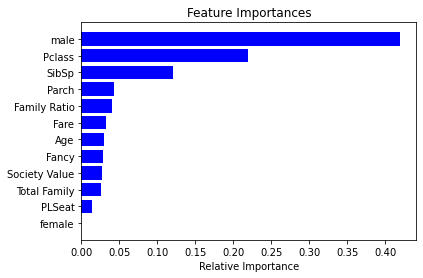

In [316]:
importances = clf.feature_importances_
indices = np.argsort(importances)

features = x_train_df1.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3>Shap Summary : Iteration 1</h3>

In [317]:
shap_values = shap.TreeExplainer(clf).shap_values(x_train_df1)

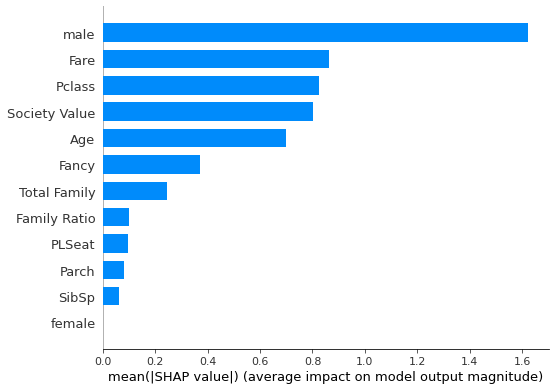

In [318]:
shap.summary_plot(shap_values, x_train_df1, plot_type="bar")

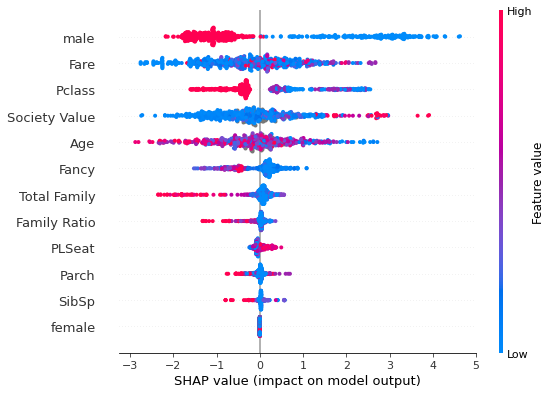

In [319]:
shap.summary_plot(shap_values, x_train_df1)

<h3>Accuracy : Iteration 1</h3>

In [320]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df1, y_pred_df1)

0.8067796610169492

<h3>Confusion Matrix : Iteration 1</h3>

In [321]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df1, y_pred_df1)

In [322]:
cm

array([[148,  27],
       [ 30,  90]])

In [323]:
tn, fp, fn, tp = cm.ravel()

In [324]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  148
False Positives :  27
False Negatives :  30
True Positives :  90


<h3>Area Under Curve (AUC) : Iteration 1</h3>

AUC - Test Set: 85.03%


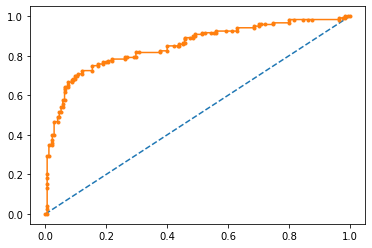

In [325]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y1 = probs1[:, 1]
auc1 = roc_auc_score(y_test_df1, probs_y1)
print('AUC - Test Set: %.2f%%' % (auc1*100))
fpr, tpr, thresholds = roc_curve(y_test_df1, probs_y1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 1</h3>

In [326]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df1,y_pred_df1))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       175
           1       0.77      0.75      0.76       120

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295



<hr>

<h3>Preliminary Train-Test Split : Iteration 2</h3>

In [327]:
from sklearn.model_selection import train_test_split

In [328]:
x_train_df2, x_test_df2, y_train_df2, y_test_df2 = train_test_split(train_df_advanced, y_advanced, test_size=0.33, random_state=42)

In [329]:
x_train_df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
6,1,54.0,0,0,51.8625,1,0,0,52.8625,0.978935,0.0,0.1
718,3,NaN,0,0,15.5000,1,0,0,18.5000,NaN,0.0,0.0
685,2,25.0,1,2,41.5792,1,0,3,43.5792,1.743168,1.0,0.6
73,3,26.0,1,0,14.4542,1,0,1,17.4542,0.671315,1.0,0.6
882,3,22.0,0,0,10.5167,0,1,0,13.5167,0.614395,0.0,0.8


In [330]:
y_train_df2.head()

6      0
718    0
685    0
73     0
882    0
Name: Survived, dtype: int64

In [331]:
x_test_df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
709,3,NaN,1,1,15.2458,1,0,2,18.2458,NaN,1.0,0.0
439,2,31.0,0,0,10.5000,1,0,0,12.5000,0.403226,0.0,0.4
840,3,20.0,0,0,7.9250,1,0,0,10.9250,0.546250,0.0,0.9
720,2,6.0,0,1,33.0000,0,1,1,35.0000,5.833333,0.5,1.0
39,3,14.0,1,0,11.2417,0,1,1,14.2417,1.017264,1.0,0.9


In [332]:
y_test_df2.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

<h3>Model Training : Iteration 2</h3>

In [333]:
import xgboost as xgb
clf = xgb.XGBClassifier(use_label_encoder=False, max_leaf_nodes=64)

In [334]:
clf.fit(x_train_df2, y_train_df2)

[21:29:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:29:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, max_leaf_nodes=64,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

<h3>Model Testing : Iteration 2</h3>

In [335]:
y_pred_df2 = clf.predict(x_test_df2)

In [336]:
y_pred_df2

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

<h3>Output to unseen data available in 'test.csv' from Iteration 2</h3>

In [337]:
clf.predict(test_df_advanced)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

<h3>Feature Importances : Iteration 2</h3>

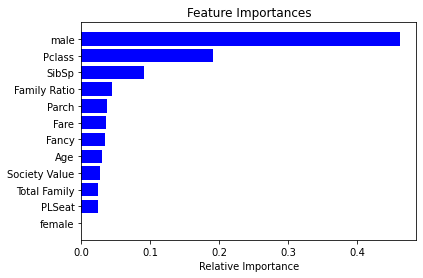

In [338]:
importances = clf.feature_importances_
indices = np.argsort(importances)

features = x_train_df2.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3>Shap Summary : Iteration 2</h3>

In [339]:
shap_values = shap.TreeExplainer(clf).shap_values(x_train_df2)

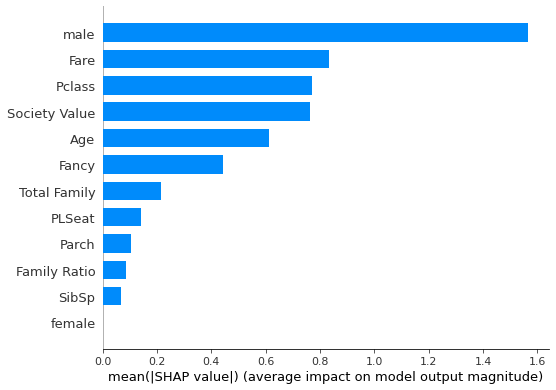

In [340]:
shap.summary_plot(shap_values, x_train_df2, plot_type="bar")

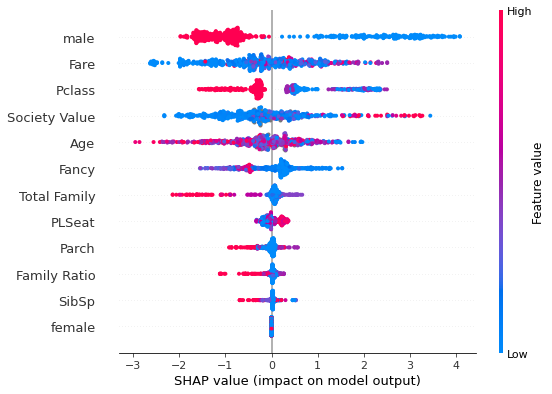

In [341]:
shap.summary_plot(shap_values, x_train_df2)

<h3>Log Loss : Iteration 2</h3>

In [342]:
probs2 = clf.predict_proba(x_test_df2)
probs2

array([[9.49504554e-01, 5.04954308e-02],
       [6.13801360e-01, 3.86198670e-01],
       [4.54425037e-01, 5.45574963e-01],
       [1.32280588e-03, 9.98677194e-01],
       [8.91303003e-01, 1.08697020e-01],
       [4.42636013e-03, 9.95573640e-01],
       [2.10675597e-01, 7.89324403e-01],
       [9.84845936e-01, 1.51540376e-02],
       [3.02636445e-01, 6.97363555e-01],
       [1.67350173e-02, 9.83264983e-01],
       [1.37465656e-01, 8.62534344e-01],
       [9.21727061e-01, 7.82729164e-02],
       [9.95233953e-01, 4.76602418e-03],
       [9.73537505e-01, 2.64624823e-02],
       [6.06467962e-01, 3.93532068e-01],
       [1.68267488e-02, 9.83173251e-01],
       [4.31972146e-01, 5.68027854e-01],
       [3.19343865e-01, 6.80656135e-01],
       [9.41451669e-01, 5.85483052e-02],
       [9.93970990e-01, 6.02900609e-03],
       [9.92564857e-01, 7.43516115e-03],
       [2.74119854e-01, 7.25880146e-01],
       [9.29697692e-01, 7.03022927e-02],
       [9.82433558e-01, 1.75664462e-02],
       [9.609299

In [343]:
from sklearn.metrics import log_loss
loss2 = log_loss(y_test_df2, probs2)
print("Logloss: %.2f" % (loss2))

Logloss: 0.59


<h3>Accuracy : Iteration 2</h3>

In [344]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df2, y_pred_df2)

0.8033898305084746

<h3>Confusion Matrix : Iteration 2</h3>

In [345]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df2, y_pred_df2)

In [346]:
cm

array([[148,  27],
       [ 31,  89]])

In [347]:
tn, fp, fn, tp = cm.ravel()

In [348]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  148
False Positives :  27
False Negatives :  31
True Positives :  89


<h3>Area Under Curve (AUC) : Iteration 2</h3>

AUC - Test Set: 84.64%


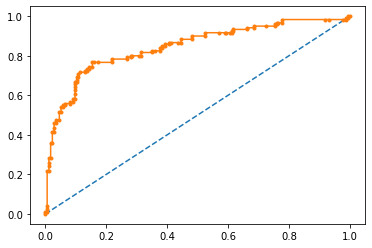

In [349]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y2 = probs2[:, 1]
auc2 = roc_auc_score(y_test_df2, probs_y2)
print('AUC - Test Set: %.2f%%' % (auc2*100))
fpr, tpr, thresholds = roc_curve(y_test_df2, probs_y2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 2</h3>

In [350]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df2,y_pred_df2))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       175
           1       0.77      0.74      0.75       120

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.80       295
weighted avg       0.80      0.80      0.80       295



<hr>

<h3>Preliminary Train-Test Split : Iteration 3</h3>

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
x_train_df3, x_test_df3, y_train_df3, y_test_df3 = train_test_split(train_df_advanced, y_advanced, test_size=0.33, random_state=42)

In [353]:
x_train_df3.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
6,1,54.0,0,0,51.8625,1,0,0,52.8625,0.978935,0.0,0.1
718,3,NaN,0,0,15.5000,1,0,0,18.5000,NaN,0.0,0.0
685,2,25.0,1,2,41.5792,1,0,3,43.5792,1.743168,1.0,0.6
73,3,26.0,1,0,14.4542,1,0,1,17.4542,0.671315,1.0,0.6
882,3,22.0,0,0,10.5167,0,1,0,13.5167,0.614395,0.0,0.8


In [354]:
y_train_df3.head()

6      0
718    0
685    0
73     0
882    0
Name: Survived, dtype: int64

In [355]:
x_test_df3.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
709,3,NaN,1,1,15.2458,1,0,2,18.2458,NaN,1.0,0.0
439,2,31.0,0,0,10.5000,1,0,0,12.5000,0.403226,0.0,0.4
840,3,20.0,0,0,7.9250,1,0,0,10.9250,0.546250,0.0,0.9
720,2,6.0,0,1,33.0000,0,1,1,35.0000,5.833333,0.5,1.0
39,3,14.0,1,0,11.2417,0,1,1,14.2417,1.017264,1.0,0.9


In [356]:
y_test_df3.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

<h3>Model Training : Iteration 3</h3>

In [359]:
import xgboost as xgb
clf = xgb.XGBClassifier(use_label_encoder=False, colsample_bytree=1)

In [360]:
clf.fit(x_train_df3, y_train_df3)

[21:30:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

<h3>Model Testing : Iteration 3</h3>

In [361]:
y_pred_df3 = clf.predict(x_test_df3)

In [362]:
y_pred_df3

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

<h3>Output to unseen data available in 'test.csv' from Iteration 3</h3>

In [363]:
clf.predict(test_df_advanced)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

<h3>Feature Importances : Iteration 3</h3>

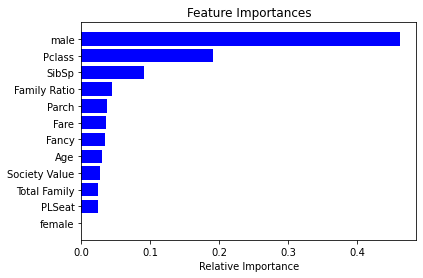

In [364]:
importances = clf.feature_importances_
indices = np.argsort(importances)

features = x_train_df3.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3>Shap Summary : Iteration 3</h3>

In [365]:
shap_values = shap.TreeExplainer(clf).shap_values(x_train_df3)

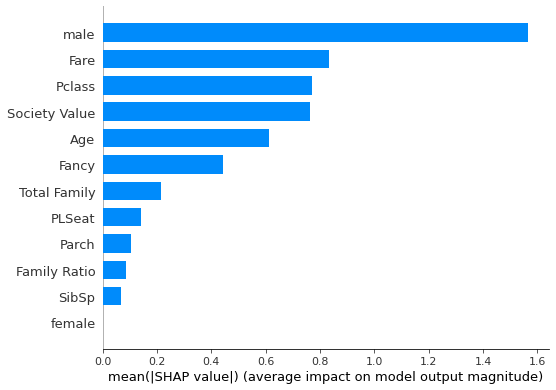

In [366]:
shap.summary_plot(shap_values, x_train_df3, plot_type="bar")

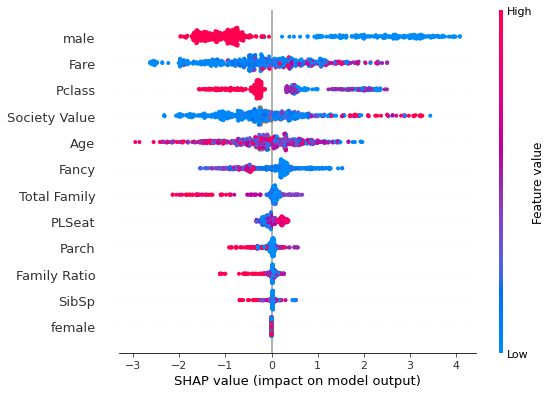

In [367]:
shap.summary_plot(shap_values, x_train_df3)

<h3>Log Loss : Iteration 3</h3>

In [368]:
probs3 = clf.predict_proba(x_test_df3)
probs3

array([[9.49504554e-01, 5.04954308e-02],
       [6.13801360e-01, 3.86198670e-01],
       [4.54425037e-01, 5.45574963e-01],
       [1.32280588e-03, 9.98677194e-01],
       [8.91303003e-01, 1.08697020e-01],
       [4.42636013e-03, 9.95573640e-01],
       [2.10675597e-01, 7.89324403e-01],
       [9.84845936e-01, 1.51540376e-02],
       [3.02636445e-01, 6.97363555e-01],
       [1.67350173e-02, 9.83264983e-01],
       [1.37465656e-01, 8.62534344e-01],
       [9.21727061e-01, 7.82729164e-02],
       [9.95233953e-01, 4.76602418e-03],
       [9.73537505e-01, 2.64624823e-02],
       [6.06467962e-01, 3.93532068e-01],
       [1.68267488e-02, 9.83173251e-01],
       [4.31972146e-01, 5.68027854e-01],
       [3.19343865e-01, 6.80656135e-01],
       [9.41451669e-01, 5.85483052e-02],
       [9.93970990e-01, 6.02900609e-03],
       [9.92564857e-01, 7.43516115e-03],
       [2.74119854e-01, 7.25880146e-01],
       [9.29697692e-01, 7.03022927e-02],
       [9.82433558e-01, 1.75664462e-02],
       [9.609299

In [369]:
from sklearn.metrics import log_loss
loss3 = log_loss(y_test_df3, probs3)
print("Logloss: %.2f" % (loss3))

Logloss: 0.59


<h3>Accuracy : Iteration 3</h3>

In [370]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df3, y_pred_df3)

0.8033898305084746

<h3>Confusion Matrix : Iteration 3</h3>

In [371]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df3, y_pred_df3)

In [372]:
cm

array([[148,  27],
       [ 31,  89]])

In [373]:
tn, fp, fn, tp = cm.ravel()

In [374]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  148
False Positives :  27
False Negatives :  31
True Positives :  89


<h3>Area Under Curve (AUC) : Iteration 3</h3>

AUC - Test Set: 84.64%


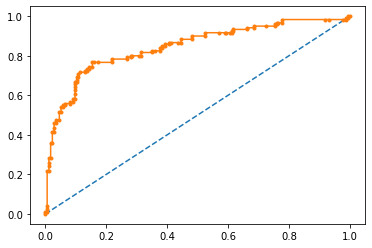

In [375]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y3 = probs3[:, 1]
auc3 = roc_auc_score(y_test_df3, probs_y3)
print('AUC - Test Set: %.2f%%' % (auc3*100))
fpr, tpr, thresholds = roc_curve(y_test_df3, probs_y3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 3</h3>

In [376]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df3,y_pred_df3))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       175
           1       0.77      0.74      0.75       120

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.80       295
weighted avg       0.80      0.80      0.80       295



<hr>

<h3>Preliminary Train-Test Split : Iteration 4</h3>

In [377]:
from sklearn.model_selection import train_test_split

In [378]:
x_train_df4, x_test_df4, y_train_df4, y_test_df4 = train_test_split(train_df_advanced, y_advanced, test_size=0.33, random_state=42)

In [379]:
x_train_df4.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
6,1,54.0,0,0,51.8625,1,0,0,52.8625,0.978935,0.0,0.1
718,3,NaN,0,0,15.5000,1,0,0,18.5000,NaN,0.0,0.0
685,2,25.0,1,2,41.5792,1,0,3,43.5792,1.743168,1.0,0.6
73,3,26.0,1,0,14.4542,1,0,1,17.4542,0.671315,1.0,0.6
882,3,22.0,0,0,10.5167,0,1,0,13.5167,0.614395,0.0,0.8


In [380]:
y_train_df4.head()

6      0
718    0
685    0
73     0
882    0
Name: Survived, dtype: int64

In [381]:
x_test_df4.head()

,Pclass,Age,SibSp,Parch,Fare,male,female,Total Family,Fancy,Society Value,Family Ratio,PLSeat
709,3,NaN,1,1,15.2458,1,0,2,18.2458,NaN,1.0,0.0
439,2,31.0,0,0,10.5000,1,0,0,12.5000,0.403226,0.0,0.4
840,3,20.0,0,0,7.9250,1,0,0,10.9250,0.546250,0.0,0.9
720,2,6.0,0,1,33.0000,0,1,1,35.0000,5.833333,0.5,1.0
39,3,14.0,1,0,11.2417,0,1,1,14.2417,1.017264,1.0,0.9


In [382]:
y_test_df4.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

<h3>Model Training : Iteration 4</h3>

In [383]:
import xgboost as xgb
clf = xgb.XGBClassifier(use_label_encoder=False, alpha=2.0)

In [384]:
clf.fit(x_train_df4, y_train_df4)

[21:31:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=2.0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=2, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

<h3>Model Testing : Iteration 4</h3>

In [385]:
y_pred_df4 = clf.predict(x_test_df4)

In [386]:
y_pred_df4

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

<h3>Output to unseen data available in 'test.csv' from Iteration 4</h3>

In [387]:
clf.predict(test_df_advanced)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<h3>Feature Importances : Iteration 4</h3>

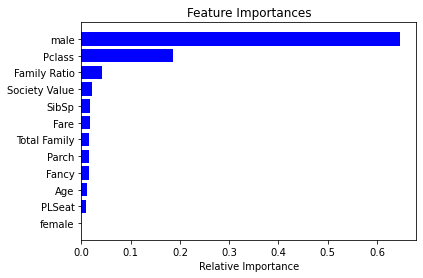

In [388]:
importances = clf.feature_importances_
indices = np.argsort(importances)

features = x_train_df4.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3>Shap Summary : Iteration 4</h3>

In [389]:
shap_values = shap.TreeExplainer(clf).shap_values(x_train_df4)

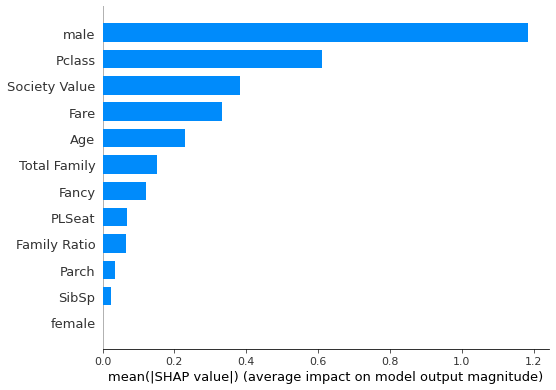

In [390]:
shap.summary_plot(shap_values, x_train_df4, plot_type="bar")

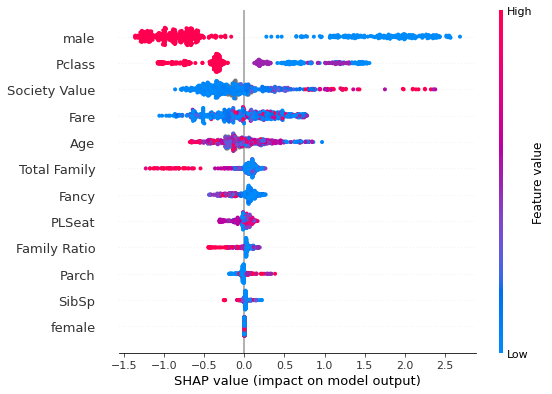

In [391]:
shap.summary_plot(shap_values, x_train_df4)

<h3>Log Loss : Iteration 4</h3>

In [392]:
probs4 = clf.predict_proba(x_test_df4)
probs4

array([[0.86744356, 0.13255647],
       [0.8176705 , 0.18232949],
       [0.7395828 , 0.26041722],
       [0.03195983, 0.96804017],
       [0.64315087, 0.35684913],
       [0.02213478, 0.9778652 ],
       [0.27912343, 0.7208766 ],
       [0.88463783, 0.11536218],
       [0.35007477, 0.64992523],
       [0.04951328, 0.9504867 ],
       [0.53246045, 0.46753958],
       [0.89134425, 0.10865575],
       [0.92307323, 0.07692677],
       [0.84335905, 0.15664096],
       [0.66477036, 0.33522964],
       [0.03250593, 0.9674941 ],
       [0.69262713, 0.30737287],
       [0.42852092, 0.5714791 ],
       [0.9130297 , 0.08697034],
       [0.8880337 , 0.11196632],
       [0.93215257, 0.06784745],
       [0.4821273 , 0.5178727 ],
       [0.69765615, 0.30234388],
       [0.9257741 , 0.07422589],
       [0.8706099 , 0.1293901 ],
       [0.949993  , 0.05000698],
       [0.54007816, 0.45992184],
       [0.8190839 , 0.18091607],
       [0.77273107, 0.22726895],
       [0.5138839 , 0.4861161 ],
       [0.

In [393]:
from sklearn.metrics import log_loss
loss4 = log_loss(y_test_df4, probs4)
print("Logloss: %.2f" % (loss4))

Logloss: 0.44


<h3>Accuracy : Iteration 4</h3>

In [394]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df4, y_pred_df4)

0.823728813559322

<h3>Confusion Matrix : Iteration 4</h3>

In [395]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_df4, y_pred_df4)

In [396]:
cm

array([[159,  16],
       [ 36,  84]])

In [397]:
tn, fp, fn, tp = cm.ravel()

In [398]:
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)

True Negatives :  159
False Positives :  16
False Negatives :  36
True Positives :  84


<h3>Area Under Curve (AUC) : Iteration 4</h3>

AUC - Test Set: 87.48%


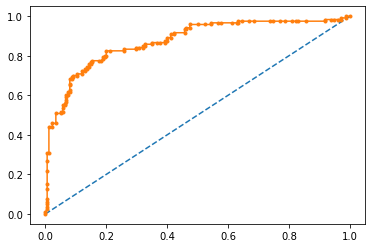

In [399]:
from sklearn.metrics import roc_auc_score, roc_curve
probs_y4 = probs4[:, 1]
auc4 = roc_auc_score(y_test_df4, probs_y4)
print('AUC - Test Set: %.2f%%' % (auc4*100))
fpr, tpr, thresholds = roc_curve(y_test_df4, probs_y4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h3>Classification Report : Iteration 4</h3>

In [400]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df4,y_pred_df4))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       175
           1       0.84      0.70      0.76       120

    accuracy                           0.82       295
   macro avg       0.83      0.80      0.81       295
weighted avg       0.83      0.82      0.82       295



<hr>